<a href="https://colab.research.google.com/github/ssmubc/Air_Quality_Analysis_Project/blob/main/Air_Quality_Analysis_Python_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Air Quality Analysis Python Project

In [ ]:
# Import dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


# Loading the dataset.
csv_file = 'https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/air-quality/AirQualityUCI.csv'
df = pd.read_csv(csv_file, sep=';')

# Dropping the 'Unnamed: 15' & 'Unnamed: 16' columns.
df = df.drop(columns=['Unnamed: 15', 'Unnamed: 16'], axis=1) 

# Dropping the null values.
df = df.dropna()

# Creating a Pandas series containing 'datetime' objects.
dt_series = pd.Series(data = [item.split("/")[2] + "-" + item.split("/")[1] + "-" + item.split("/")[0] for item in df['Date']], index=df.index) + ' ' + pd.Series(data=[str(item).replace(".", ":") for item in df['Time']], index=df.index)
dt_series = pd.to_datetime(dt_series)

# Remove the Date & Time columns from the DataFrame and insert the 'dt_series' in it.
df = df.drop(columns=['Date', 'Time'], axis=1)
df.insert(loc=0, column='DateTime', value=dt_series)

# Get the Pandas series containing the year values as integers.
year_series = dt_series.dt.year

# Get the Pandas series containing the month values as integers.
month_series = dt_series.dt.month

# Get the Pandas series containing the day values as integers.
day_series = dt_series.dt.day

# Get the Pandas series containing the days of a week, i.e., Monday, Tuesday, Wednesday etc.
day_name_series = dt_series.dt.day_name()

# Add the 'Year', 'Month', 'Day' and 'Day Name' columns to the DataFrame.
df['Year'] = year_series
df['Month'] = month_series
df['Day'] = day_series
df['Day Name'] = day_name_series

# Sort the DataFrame by the 'DateTime' values in the ascending order. Also, display the first 10 rows of the DataFrame.
df = df.sort_values(by='DateTime')

# Create a function to replace the commas with periods in a Pandas series.
def comma_to_period(series):
    new_series = pd.Series(data=[float(str(item).replace(',', '.')) for item in series], index=df.index)
    return new_series

# Apply the 'comma_to_period()' function on the ''CO(GT)', 'C6H6(GT)', 'T', 'RH' and 'AH' columns.
cols_to_correct = ['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH'] # Create a list of column names.
for col in cols_to_correct: # Iterate through each column
    df[col] = comma_to_period(df[col]) # Replace the original column with the new series.

# Remove all the columns from the 'df' DataFrame containing more than 10% garbage value.
df = df.drop(columns=['NMHC(GT)', 'CO(GT)', 'NOx(GT)', 'NO2(GT)'], axis=1)

# Create a new DataFrame containing records for the years 2004 and 2005.
aq_2004_df = df[df['Year'] == 2004]
aq_2005_df = df[df['Year'] == 2005]

# Replace the -200 value with the median values for each column having indices between 1 and -4 (excluding -4) for the 2004 year DataFrame.
for col in aq_2004_df.columns[1:-4]:
  median = aq_2004_df.loc[aq_2004_df[col] != -200, col].median() # Get the median value for each column after excluding -200.
  aq_2004_df[col] = aq_2004_df[col].replace(to_replace=-200, value=median)

# Repeat the same exercise for the 2005 year DataFrame.
for col in aq_2005_df.columns[1:-4]:
  median = aq_2005_df.loc[aq_2005_df[col] != -200, col].median()
  aq_2005_df[col] = aq_2005_df[col].replace(to_replace=-200, value=median)

# Get the columns in the original DataFrame.
df.head()

,DateTime,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Month,Day,Day Name
0,2004-03-10 18:00:00,1360.0,11.9,1046.0,1056.0,1692.0,1268.0,13.6,48.9,0.7578,2004,3,10,Wednesday
1,2004-03-10 19:00:00,1292.0,9.4,955.0,1174.0,1559.0,972.0,13.3,47.7,0.7255,2004,3,10,Wednesday
2,2004-03-10 20:00:00,1402.0,9.0,939.0,1140.0,1555.0,1074.0,11.9,54.0,0.7502,2004,3,10,Wednesday
3,2004-03-10 21:00:00,1376.0,9.2,948.0,1092.0,1584.0,1203.0,11.0,60.0,0.7867,2004,3,10,Wednesday
4,2004-03-10 22:00:00,1272.0,6.5,836.0,1205.0,1490.0,1110.0,11.2,59.6,0.7888,2004,3,10,Wednesday


The description for all the columns containing data for air pollutants, temperature, relative humidity and absolute humidity is provided below.


|Columns|Description|
|-|-|
|PT08.S1(CO)|PT08.S1 (tin oxide) hourly averaged sensor response (nominally $\text{CO}$ targeted)|
|C6H6(GT)|True hourly averaged Benzene concentration in $\frac{\mu g}{m^3}$|
|PT08.S2(NMHC)|PT08.S2 (titania) hourly averaged sensor response (nominally $\text{NMHC}$ targeted)|
|PT08.S3(NOx)|PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally $\text{NO}_x$ targeted)|
|PT08.S4(NO2)|PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally $\text{NO}_2$ targeted)|
|PT08.S5(O3) |PT08.S5 (indium oxide) hourly averaged sensor response (nominally $\text{O}_3$ targeted)|
|T|Temperature in Â°C|
|RH|Relative Humidity (%)|
|AH|AH Absolute Humidity|

---

#### Customised `matplotlib` Plots^

Created a line plot to trace the monthly median concentration of air pollutants, temperature, relative humidity and average humidity in 2004 and 2005.

In [ ]:
aq_2004_df

,DateTime,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Month,Day,Day Name
0,2004-03-10 18:00:00,1360.0,11.9,1046.0,1056.0,1692.0,1268.0,13.6,48.9,0.7578,2004,3,10,Wednesday
1,2004-03-10 19:00:00,1292.0,9.4,955.0,1174.0,1559.0,972.0,13.3,47.7,0.7255,2004,3,10,Wednesday
2,2004-03-10 20:00:00,1402.0,9.0,939.0,1140.0,1555.0,1074.0,11.9,54.0,0.7502,2004,3,10,Wednesday
3,2004-03-10 21:00:00,1376.0,9.2,948.0,1092.0,1584.0,1203.0,11.0,60.0,0.7867,2004,3,10,Wednesday
4,2004-03-10 22:00:00,1272.0,6.5,836.0,1205.0,1490.0,1110.0,11.2,59.6,0.7888,2004,3,10,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7105,2004-12-31 19:00:00,930.0,5.3,781.0,933.0,906.0,866.0,9.3,33.6,0.3958,2004,12,31,Friday
7106,2004-12-31 20:00:00,962.0,5.3,780.0,919.0,909.0,884.0,9.6,32.3,0.3871,2004,12,31,Friday
7107,2004-12-31 21:00:00,974.0,5.5,790.0,915.0,895.0,951.0,9.1,32.5,0.3766,2004,12,31,Friday
7108,2004-12-31 22:00:00,1055.0,5.6,791.0,845.0,936.0,1195.0,9.1,37.2,0.4310,2004,12,31,Friday


In [ ]:
group_2004_month['Month'].unique()

Month
3      [3]
4      [4]
5      [5]
6      [6]
7      [7]
8      [8]
9      [9]
10    [10]
11    [11]
12    [12]
Name: Month, dtype: object

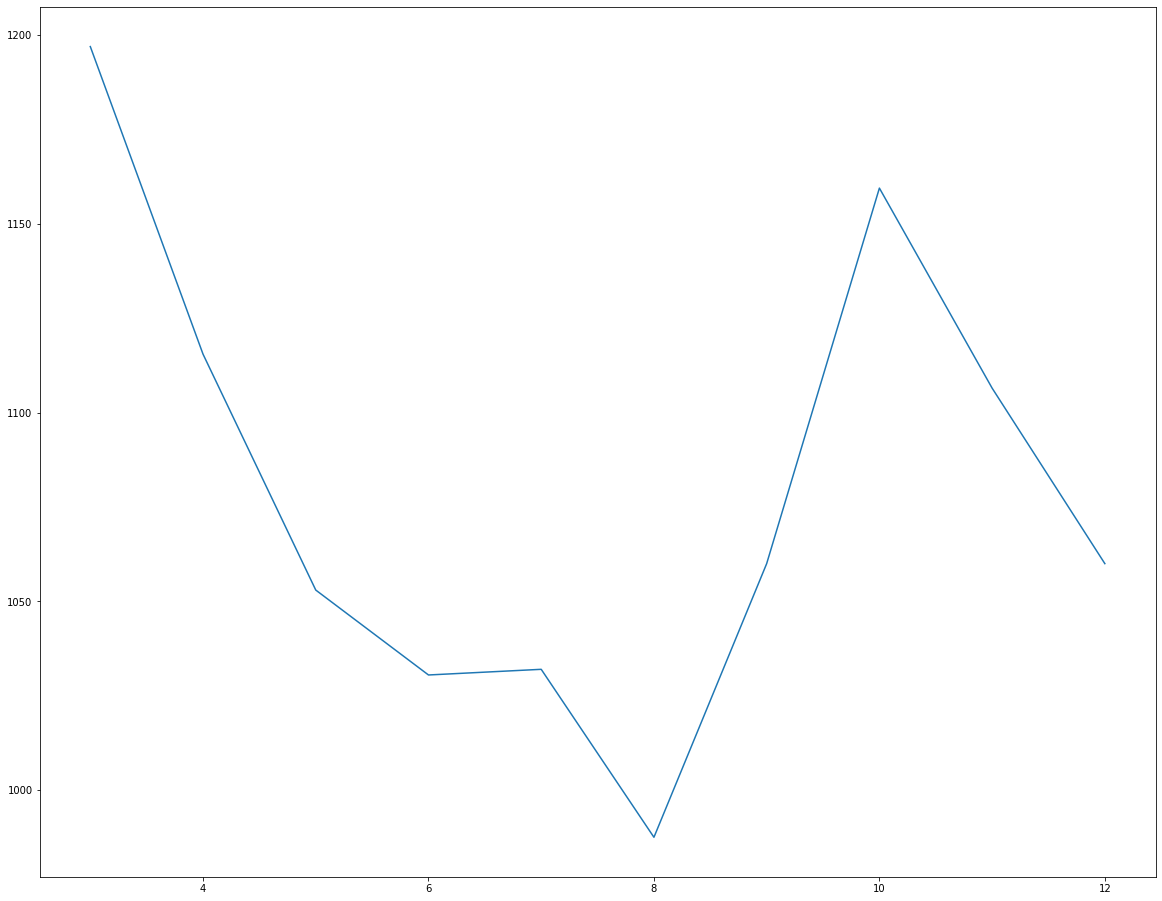

In [ ]:
plt.figure(figsize=(20, 16))
group_2004_month = aq_2004_df.groupby(by='Month')

plt.plot(group_2004_month.median()['PT08.S1(CO)'])
plt.show()


In [ ]:
print(group_2004_month.median()['Month'])

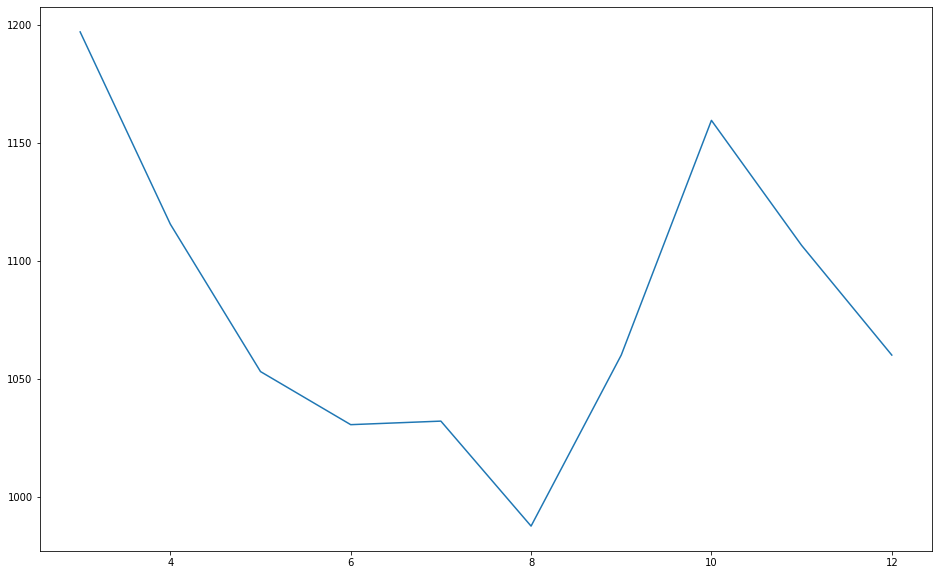

In [ ]:
# Created a line plot for the monthly median concentration of CO in 2004.
# Group the DataFrames month-wise such that the 'Month' column is not an index.

#aq_2004_df.groupby('Month')

months = aq_2004_df['Month'].unique()

a = []
for i in months:
  b = aq_2004_df.loc[aq_2004_df['Month'] == i, 'PT08.S1(CO)'].median()
  a.append(b)

plt.figure(figsize=(16, 10))


plt.plot(months, a)
plt.show()






In [ ]:
# Created a line plot for the monthly median concentration of CO in 2004.
# Group the DataFrames month-wise such that the 'Month' column is not an index.

group_2004_month = aq_2004_df.groupby(by='Month', as_index=False)
values = []
months = aq_2004_df['Month'].unique()
for i in months:
  m = organized_month.get_group(i)
  c = m['PT08.S1(CO)'].median()
  values.append(c)


months = aq_2004_df['Month'].unique()

plt.figure(figsize=(16, 10))


plt.plot(months, values)
plt.show()






NameError: ignored

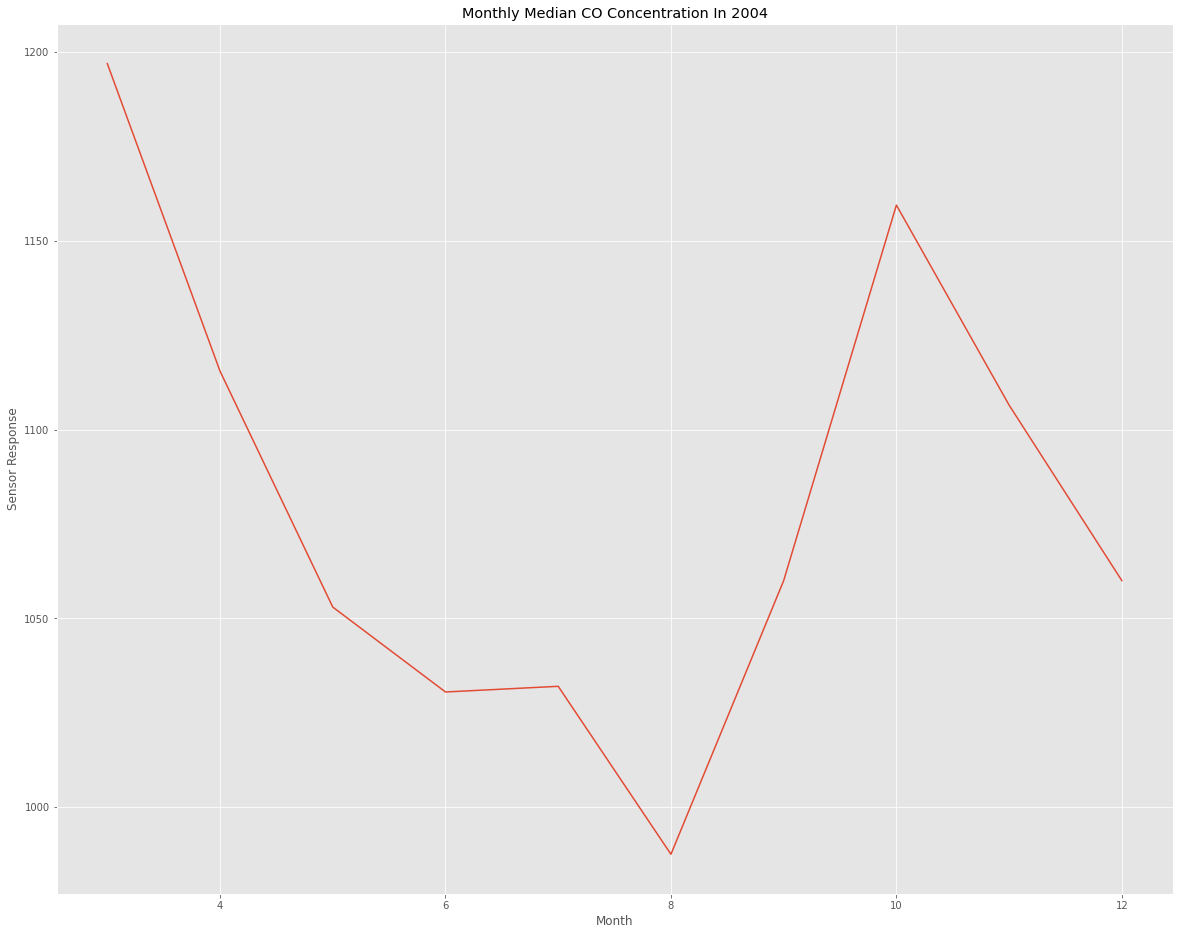

In [ ]:
plt.style.use('ggplot')

plt.figure(figsize=(20, 16))
plt.title('Monthly Median CO Concentration In 2004')
plt.xlabel('Month')
plt.ylabel('Sensor Response')


plt.plot(group_2004_month.median()['Month'], group_2004_month.median()['PT08.S1(CO)'])
plt.grid(True)
plt.show()


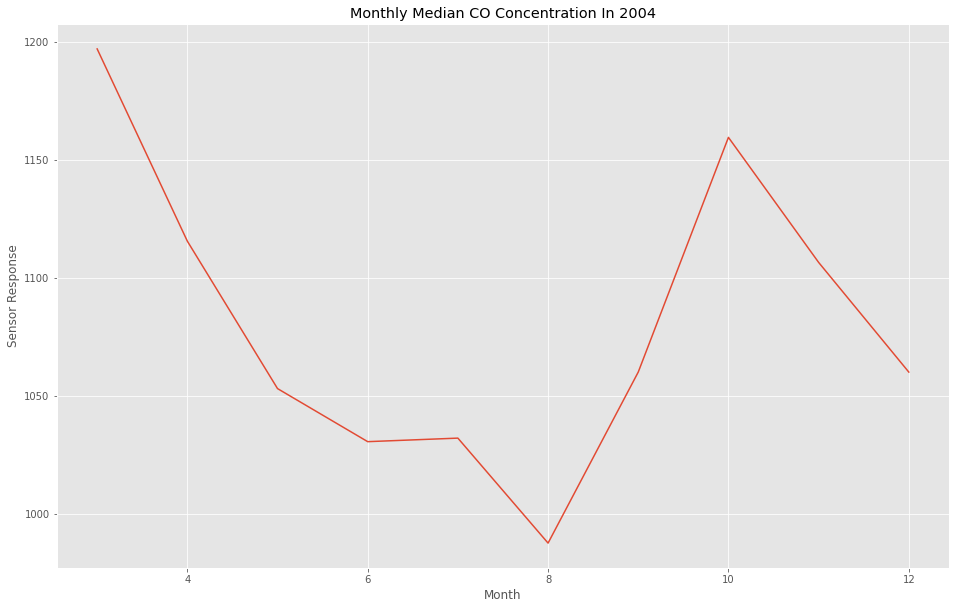

In [ ]:
# Added the 'ggplot' style and a title in the above plot. Also, label the coordinate axes and add a grid.
aq_2004_df.groupby('Month')

months = aq_2004_df['Month'].unique()

a = []
for i in months:
  b = aq_2004_df.loc[aq_2004_df['Month'] == i, 'PT08.S1(CO)'].median()
  a.append(b)

plt.figure(figsize=(16, 10))
plt.style.use('ggplot')
plt.grid(True)
plt.title('Monthly Median CO Concentration In 2004')
plt.xlabel('Month')
plt.ylabel('Sensor Response')


plt.plot(months, a)
plt.show()

In [ ]:
group_2005_month

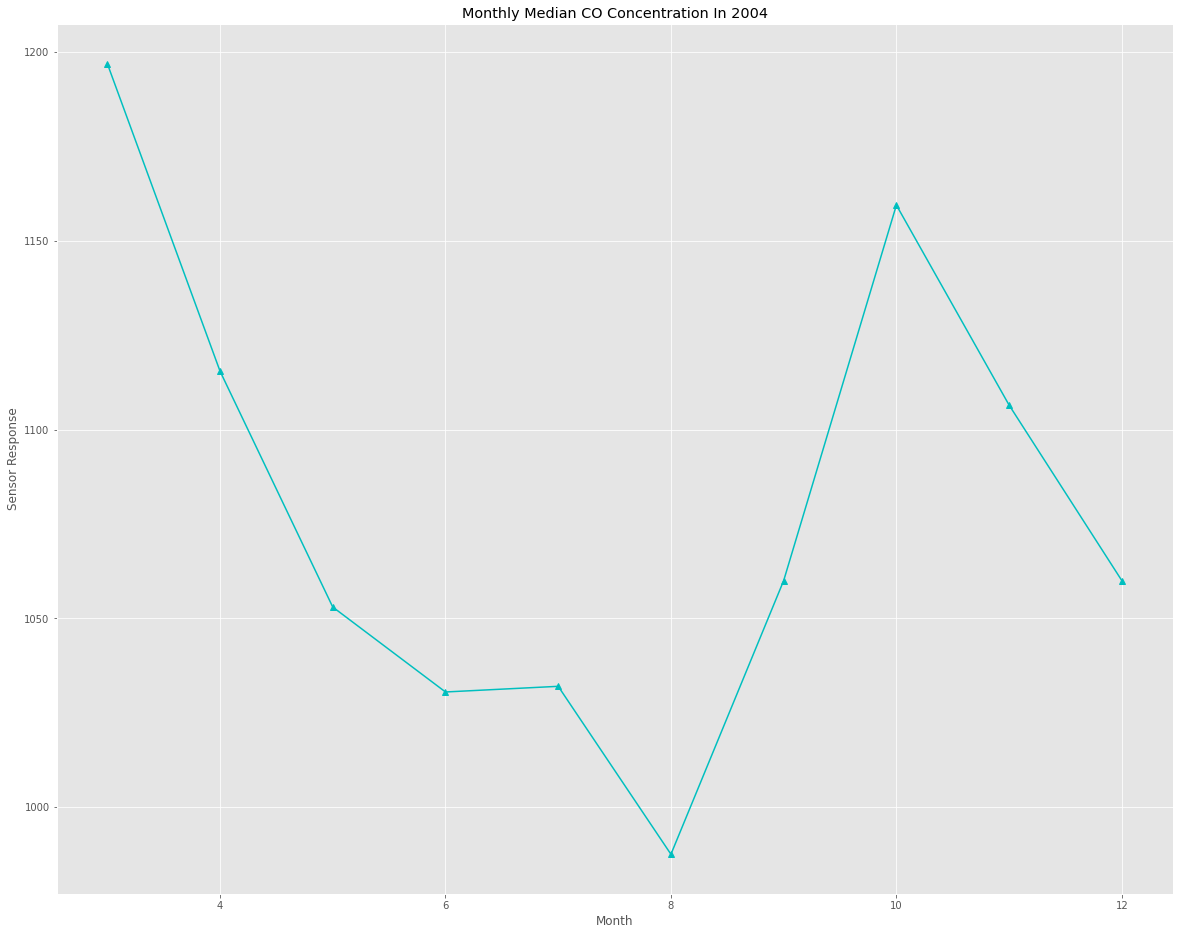

In [ ]:
plt.style.use('ggplot')

plt.figure(figsize=(20, 16))
plt.title('Monthly Median CO Concentration In 2004')
plt.xlabel('Month')
plt.ylabel('Sensor Response')

plt.plot(group_2004_month.median()['Month'], group_2004_month.median()['PT08.S1(CO)'], 'c-^')
plt.grid(True)
plt.show()


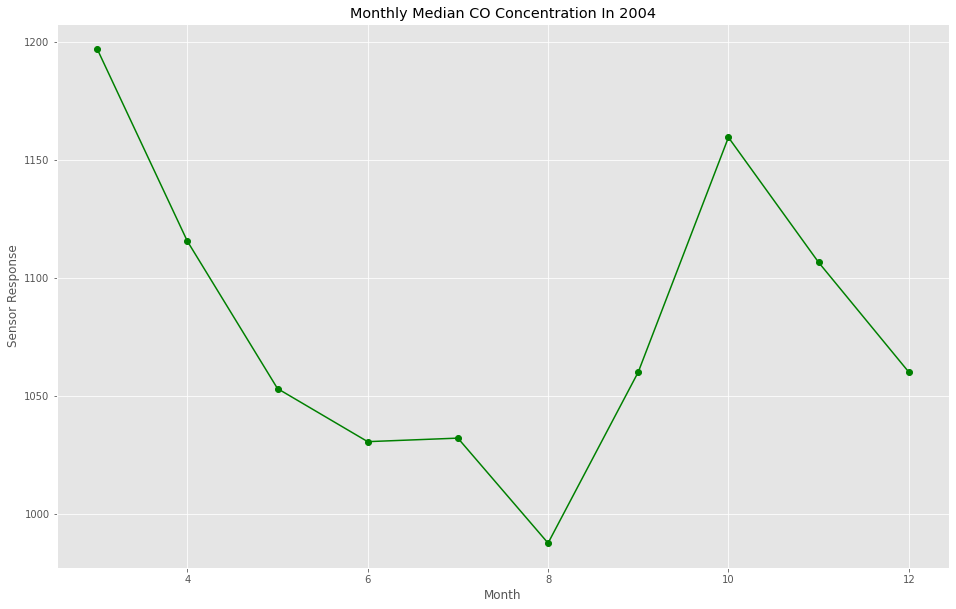

In [ ]:
aq_2004_df.groupby('Month')

months = aq_2004_df['Month'].unique()

a = []
for i in months:
  b = aq_2004_df.loc[aq_2004_df['Month'] == i, 'PT08.S1(CO)'].median()
  a.append(b)

plt.figure(figsize=(16, 10))
plt.style.use('ggplot')
plt.grid(True)
plt.title('Monthly Median CO Concentration In 2004')
plt.xlabel('Month')
plt.ylabel('Sensor Response')


plt.plot(months, a, 'g-o')
plt.show()

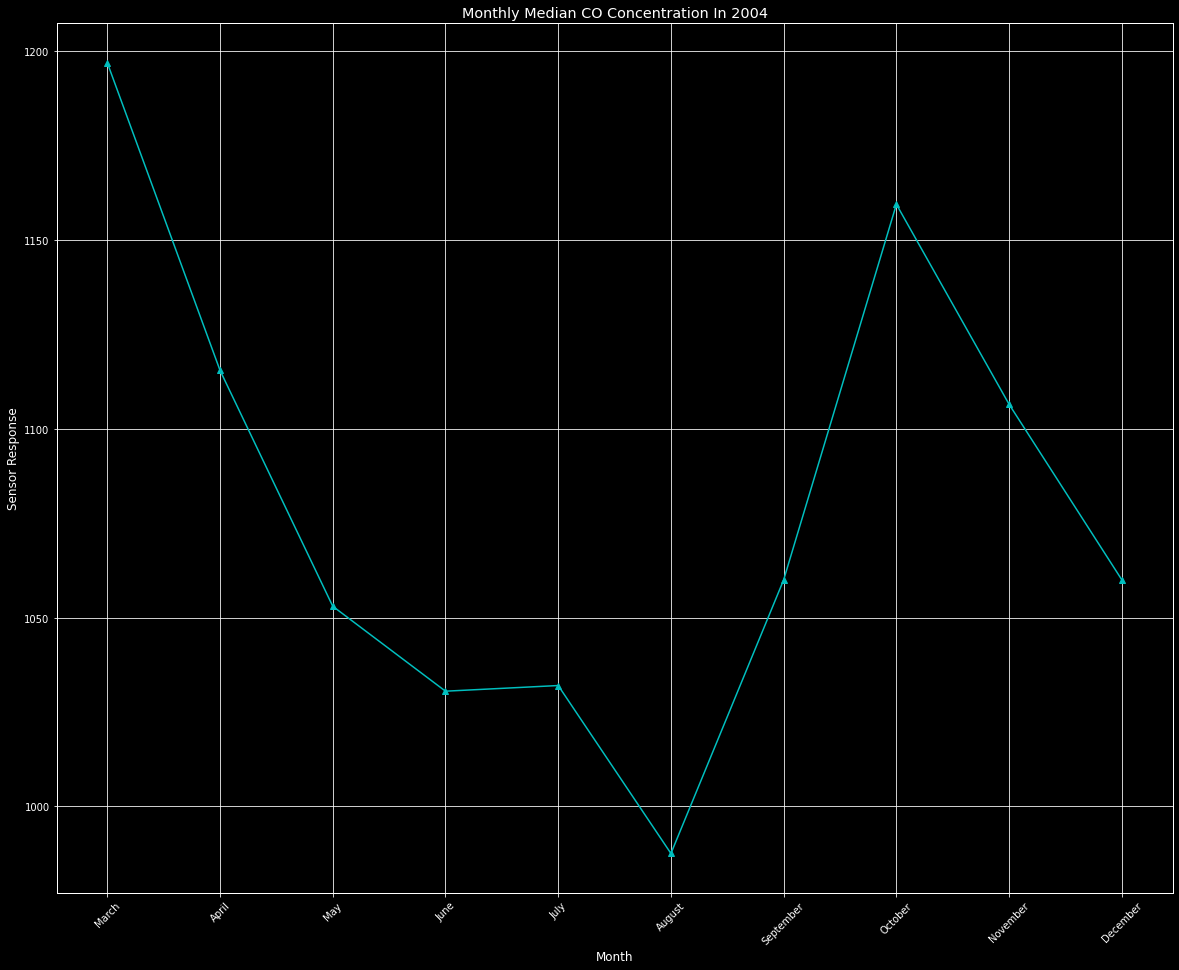

In [ ]:
months_2004 = aq_2004_df['DateTime'].dt.month_name().unique()



plt.style.use('dark_background')

plt.figure(figsize=(20, 16))
plt.title('Monthly Median CO Concentration In 2004')
plt.xlabel('Month')
plt.ylabel('Sensor Response')




plt.xticks(ticks=group_2004_month.median()['Month'], labels=months_2004, rotation=45)

plt.plot(group_2004_month.median()['Month'], group_2004_month.median()['PT08.S1(CO)'], 'c-^')
plt.grid(True)
plt.show()


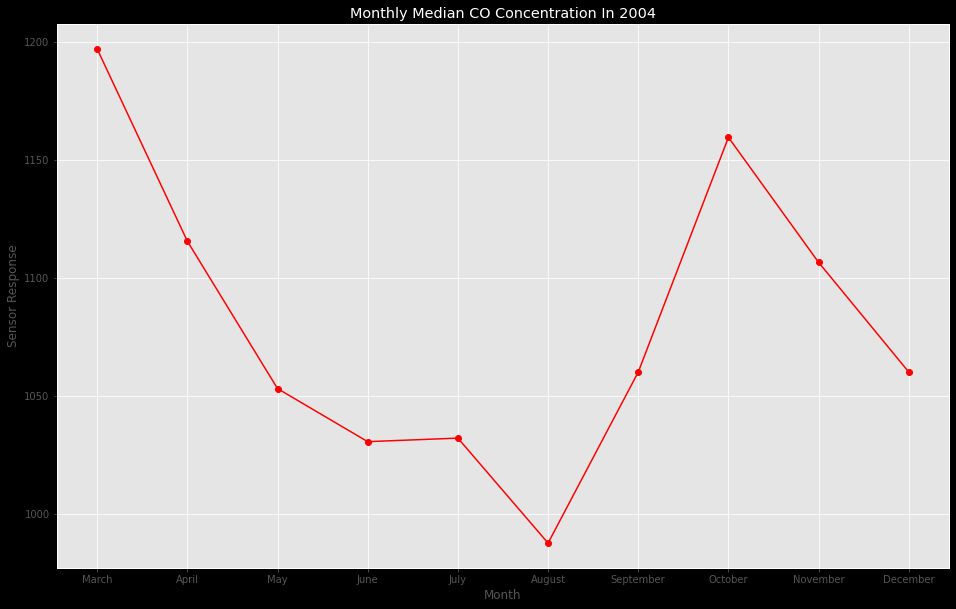

In [ ]:
# In the above plot, we replaced the numeric values in the 'x-axis' with the actual month names.
# Created a list of actual month names.

aq_2004_df.groupby('Month')

months = aq_2004_df['Month'].unique()

a = []
for i in months:
  b = aq_2004_df.loc[aq_2004_df['Month'] == i, 'PT08.S1(CO)'].median()
  a.append(b)

plt.figure(figsize=(16, 10))
plt.style.use('ggplot')
plt.grid(True)
plt.title('Monthly Median CO Concentration In 2004')
plt.xlabel('Month')
plt.ylabel('Sensor Response')


name_of_month = ['March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.xticks(ticks=months, labels=name_of_month)
plt.plot(months, a, 'r-o')
plt.show()




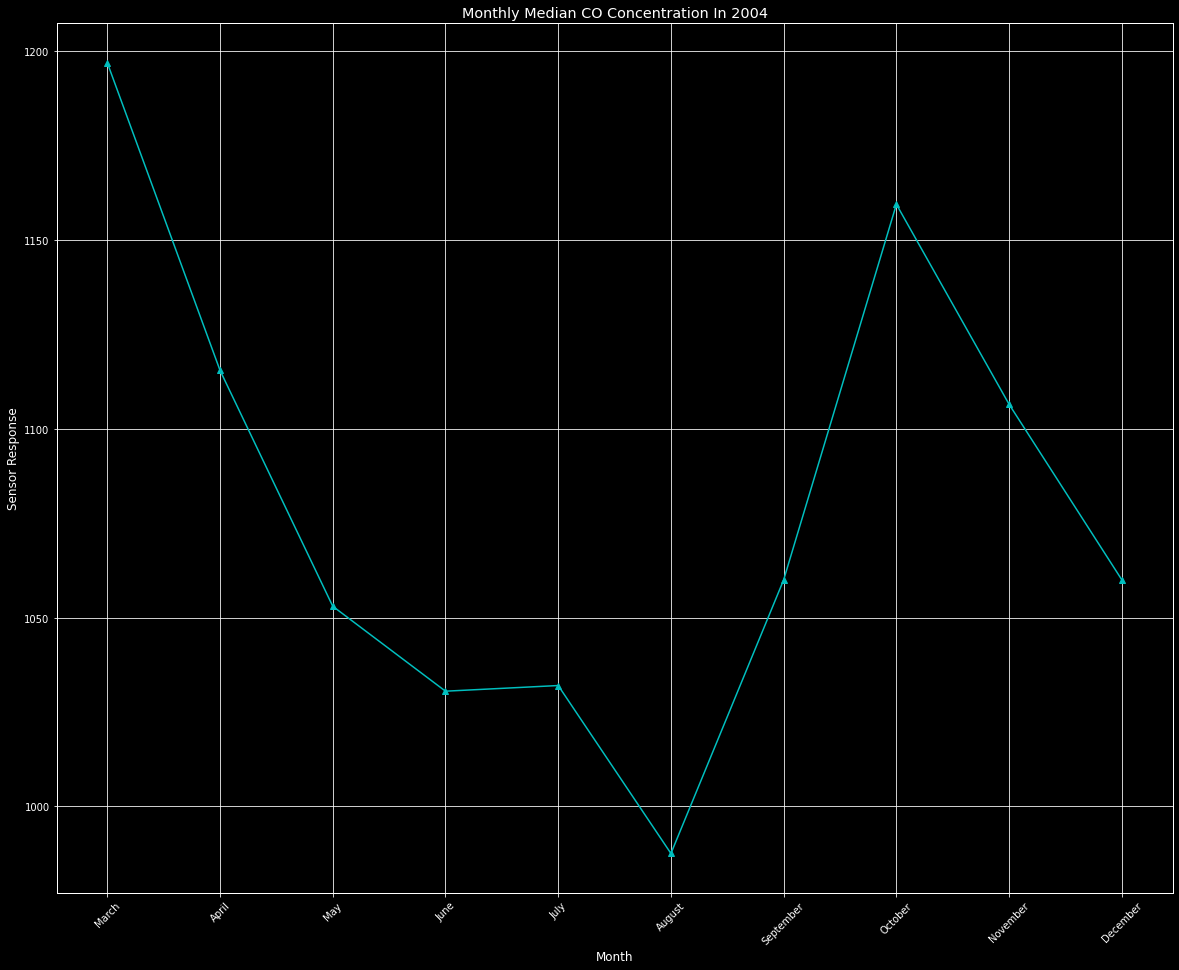

In [ ]:
months_2004 = aq_2004_df['DateTime'].dt.month_name().unique()



plt.style.use('dark_background')

plt.figure(figsize=(20, 16))
plt.title('Monthly Median CO Concentration In 2004')
plt.xlabel('Month')
plt.ylabel('Sensor Response')




plt.xticks(ticks=group_2004_month.median()['Month'], labels=months_2004, rotation=45)

plt.plot(group_2004_month.median()['Month'], group_2004_month.median()['PT08.S1(CO)'], 'c-^')
plt.grid(True)
plt.show()


In [ ]:
# Created two lists constaining the month numbers and month names that are common to 2004 and 2005 observations.
same_months = []
for i in aq_2004_df['Month'].unique():
  for j in aq_2005_df['Month'].unique():
    if i == j:
      same_months.append(i)

same_months

names_of_same_months = []

for i in aq_2004_df['DateTime'].dt.month_name().unique():
  for j in aq_2005_df['DateTime'].dt.month_name().unique():
    if i == j:
      names_of_same_months.append(i)

print(same_months)
print(names_of_same_months)
#names_of_same_months = ['March', 'April']


[3, 4]
['March', 'April']


In [ ]:
aq_2005_df['Month'].head(1)

Created two DataFrames containing median values and grouped by months that are common to 2004 and 2005 observations.

In [ ]:
#aq_2004_common_months = aq_2004_df[(aq_2004_df['Month'] == 3) | (aq_2004_df['Month'] == 4)]
#aq_2004_common_months = 
aq_2004_common_months = group_2004_month.median()[group_2004_month.median()['Month'] <5]
aq_2004_common_months

,Month,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Day
0,3,1197.0,8.65,926.0,966.5,1543.0,992.5,14.05,52.2,0.79205,2004.0,21.0
1,4,1115.5,8.80,931.0,882.0,1555.0,949.0,16.30,50.1,0.92410,2004.0,15.5


In [ ]:
# Created a DataFrame for 2004 containing median values and grouped by months that are common to 2004 and 2005 observations.

#pd.DataFrame(data=aq_2004_df.loc[aq_2004_df['Month'] == [3, 4], :])
group_month = aq_2004_df.groupby('Month')


d_new = group_month.get_group(3)
d_sec_new = group_month.get_group(4)

d_2004_common_final = pd.concat([d_new, d_sec_new])
d_2004_common_final

#a = group_month.get_group(3)
#for i in same_months:
#  common_2004_df = aq_2004_df.loc[aq_2004_df['Month'] == i, :]
#common_2004_df[common_2004_df['Month'] == 3]
#common_2004_df.head()
#a

,DateTime,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Month,Day,Day Name
0,2004-03-10 18:00:00,1360.0,11.9,1046.0,1056.0,1692.0,1268.0,13.6,48.9,0.7578,2004,3,10,Wednesday
1,2004-03-10 19:00:00,1292.0,9.4,955.0,1174.0,1559.0,972.0,13.3,47.7,0.7255,2004,3,10,Wednesday
2,2004-03-10 20:00:00,1402.0,9.0,939.0,1140.0,1555.0,1074.0,11.9,54.0,0.7502,2004,3,10,Wednesday
3,2004-03-10 21:00:00,1376.0,9.2,948.0,1092.0,1584.0,1203.0,11.0,60.0,0.7867,2004,3,10,Wednesday
4,2004-03-10 22:00:00,1272.0,6.5,836.0,1205.0,1490.0,1110.0,11.2,59.6,0.7888,2004,3,10,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,2004-04-30 19:00:00,1626.0,26.9,1476.0,555.0,2356.0,1786.0,19.8,58.6,1.3392,2004,4,30,Friday
1226,2004-04-30 20:00:00,1449.0,19.5,1282.0,625.0,2100.0,1569.0,19.1,61.1,1.3345,2004,4,30,Friday
1227,2004-04-30 21:00:00,1363.0,15.1,1152.0,684.0,1951.0,1495.0,18.2,65.4,1.3529,2004,4,30,Friday
1228,2004-04-30 22:00:00,1371.0,14.6,1136.0,689.0,1927.0,1471.0,18.1,66.1,1.3579,2004,4,30,Friday


In [ ]:
group_2005_month = aq_2005_df.groupby(by='Month', as_index=False)

In [ ]:
aq_2005_common_months = group_2005_month.median()[group_2005_month.median()['Month'] >=3]
aq_2005_common_months

,Month,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Day
2,3,1126.0,6.6,841.0,684.5,1217.0,1039.5,13.5,51.8,0.7834,2005.0,16.0
3,4,925.0,3.3,669.0,906.0,936.0,556.0,15.1,35.6,0.5977,2005.0,2.0


In [ ]:
group_2005_month.median()

,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Day
Month,,,,,,,,,,,
1,1076.0,6.3,826.0,740.0,1109.0,1011.0,8.10,54.75,0.6304,2005.0,16.0
2,1070.0,6.3,826.0,740.0,1039.0,1011.0,7.35,52.20,0.5208,2005.0,14.5
3,1126.0,6.6,841.0,684.5,1217.0,1039.5,13.50,51.80,0.7834,2005.0,16.0
4,925.0,3.3,669.0,906.0,936.0,556.0,15.10,35.60,0.5977,2005.0,2.0


In [ ]:
# Created a DataFrame for 2005 containing median values and grouped by months that are common to 2004 and 2005 observations.
group_2005_month = aq_2005_df.groupby('Month')

new_2005_df = group_2005_month.get_group(3)
new_2005_sec_df = group_2005_month.get_group(4)

d_2005_common_final = pd.concat([new_2005_df, new_2005_sec_df])


#print(d_2005_common_final)


print(d_2005_common_final['PT08.S1(CO)'].median())

1101.0


In [ ]:
aq_2004_common_months[(aq_2004_common_months['Month'] == 3) | (aq_2004_common_months['Month'] == 4)].median()

#['PT08.S1(CO)']

PT08.S1(CO)      1145.5000
C6H6(GT)            8.7000
PT08.S2(NMHC)     929.0000
PT08.S3(NOx)      922.0000
PT08.S4(NO2)     1548.5000
PT08.S5(O3)       964.0000
T                  15.4000
RH                 50.9000
AH                  0.8669
Year             2004.0000
Month               4.0000
Day                18.0000
dtype: float64

In [ ]:
aq_2004_common_months['Month'].unique()

array([3, 4])

In [ ]:
aq_2004_common_months.loc[aq_2004_common_months['Month'] == 3, 'PT08.S1(CO)'].median()

In [ ]:
aq_2004_common_months['Month']

0       3
1       3
2       3
3       3
4       3
       ..
1225    4
1226    4
1227    4
1228    4
1229    4
Name: Month, Length: 1230, dtype: int64

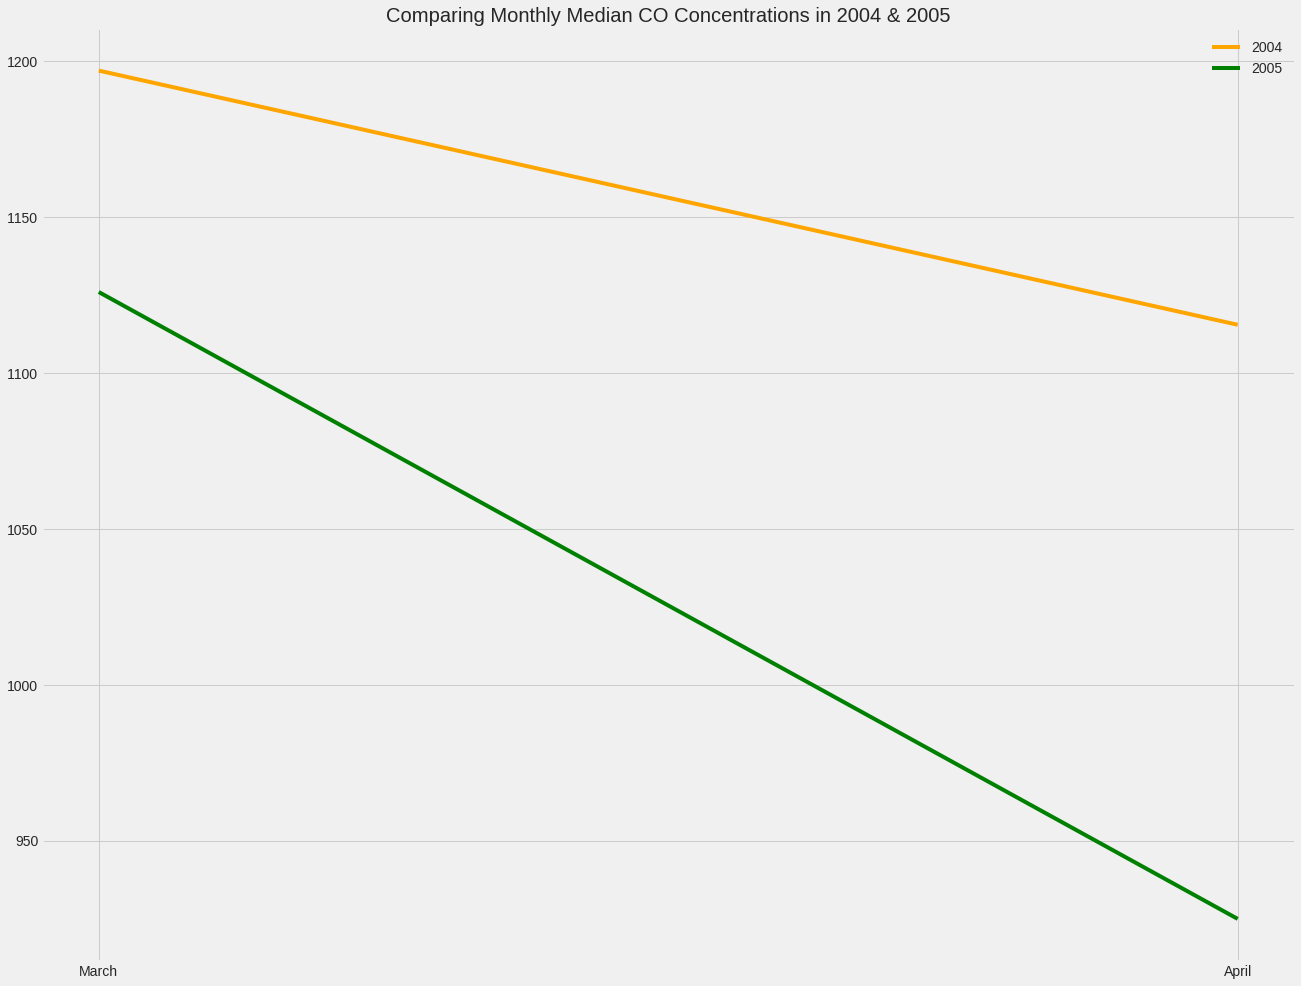

In [ ]:
# Created a line plot for the monthly median CO concentrations for both the years. Use the 'seaborn-dark' style this time. 
#plt.style.use('seaborn-dark')

plt.figure(figsize=(20, 16))
plt.title('Comparing Monthly Median CO Concentrations in 2004 & 2005')


plt.plot(aq_2004_common_months['Month'],  aq_2004_common_months['PT08.S1(CO)'], color = 'orange', label='2004')
plt.plot(aq_2005_common_months['Month'], aq_2005_common_months['PT08.S1(CO)'], color = 'green', label='2005')
plt.xticks(ticks=aq_2004_common_months['Month'], labels=names_of_same_months)

plt.legend()
plt.grid(True)
plt.show()

In [ ]:
aq_2004_common_months

,DateTime,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Month,Day,Day Name
0,2004-03-10 18:00:00,1360.0,11.9,1046.0,1056.0,1692.0,1268.0,13.6,48.9,0.7578,2004,3,10,Wednesday
1,2004-03-10 19:00:00,1292.0,9.4,955.0,1174.0,1559.0,972.0,13.3,47.7,0.7255,2004,3,10,Wednesday
2,2004-03-10 20:00:00,1402.0,9.0,939.0,1140.0,1555.0,1074.0,11.9,54.0,0.7502,2004,3,10,Wednesday
3,2004-03-10 21:00:00,1376.0,9.2,948.0,1092.0,1584.0,1203.0,11.0,60.0,0.7867,2004,3,10,Wednesday
4,2004-03-10 22:00:00,1272.0,6.5,836.0,1205.0,1490.0,1110.0,11.2,59.6,0.7888,2004,3,10,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,2004-04-30 19:00:00,1626.0,26.9,1476.0,555.0,2356.0,1786.0,19.8,58.6,1.3392,2004,4,30,Friday
1226,2004-04-30 20:00:00,1449.0,19.5,1282.0,625.0,2100.0,1569.0,19.1,61.1,1.3345,2004,4,30,Friday
1227,2004-04-30 21:00:00,1363.0,15.1,1152.0,684.0,1951.0,1495.0,18.2,65.4,1.3529,2004,4,30,Friday
1228,2004-04-30 22:00:00,1371.0,14.6,1136.0,689.0,1927.0,1471.0,18.1,66.1,1.3579,2004,4,30,Friday


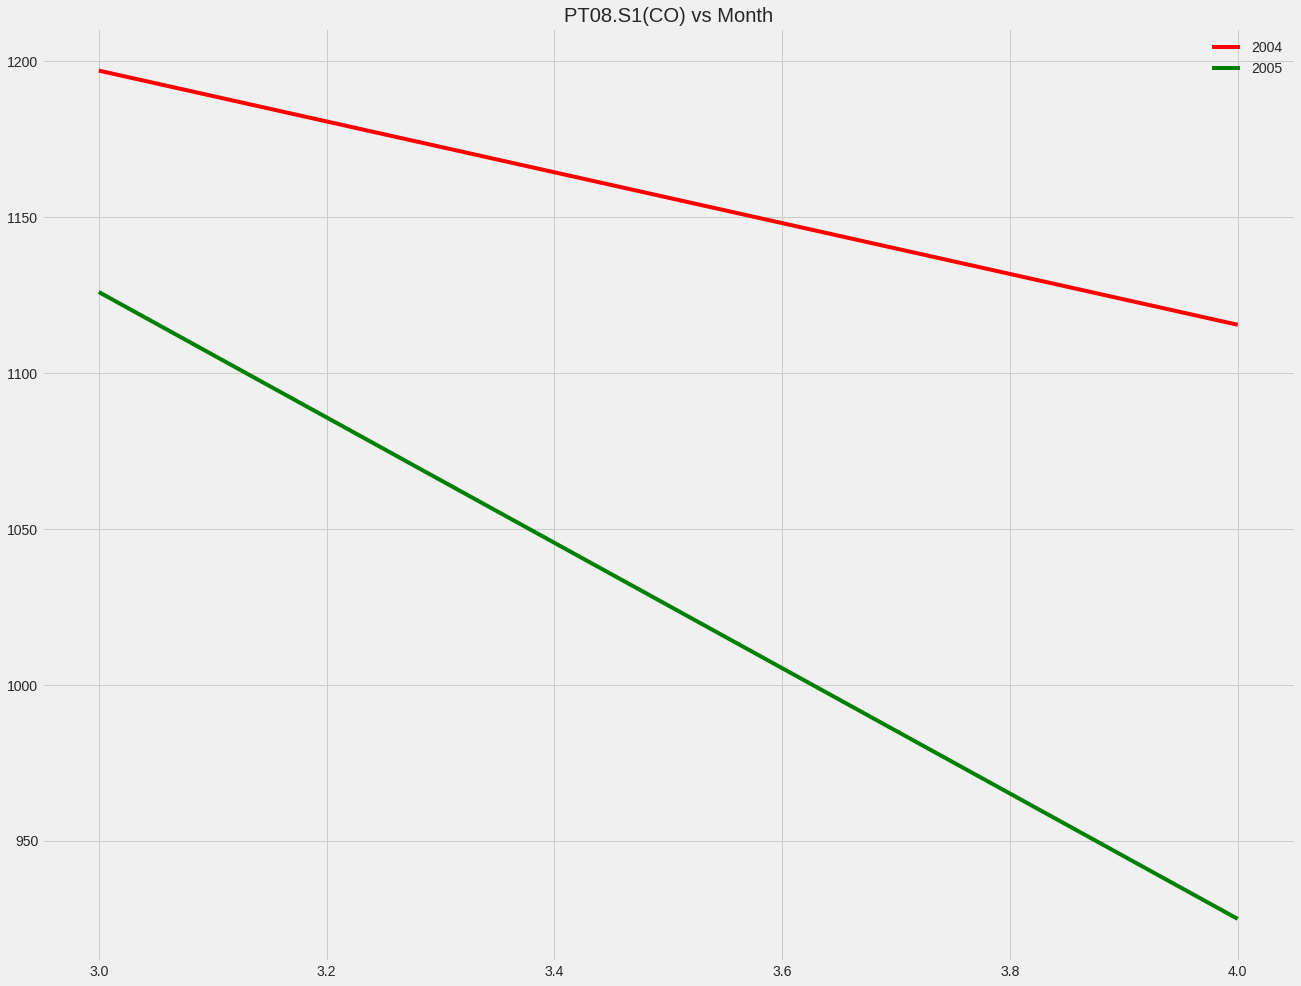

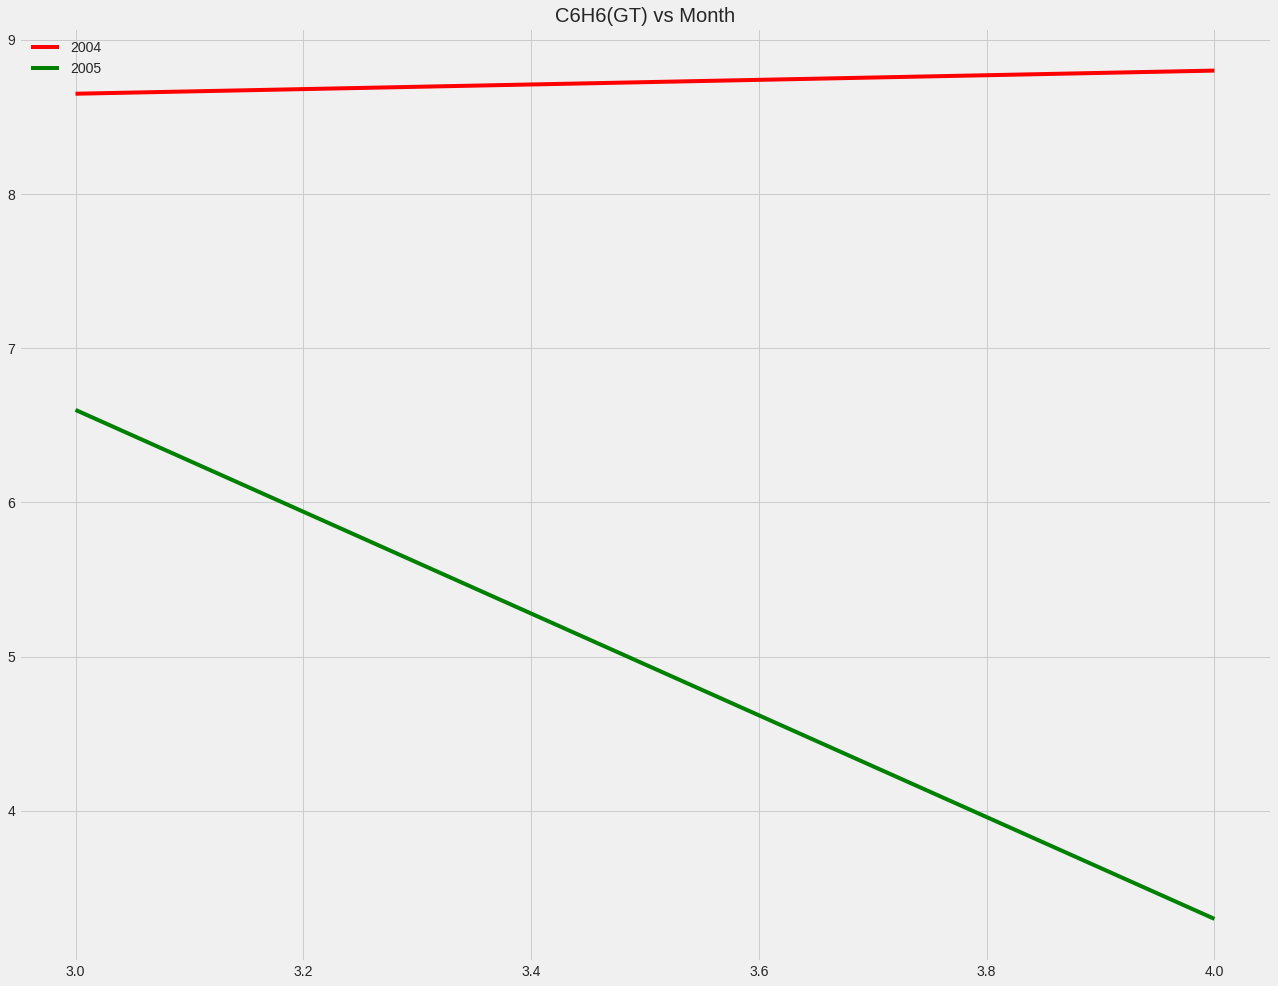

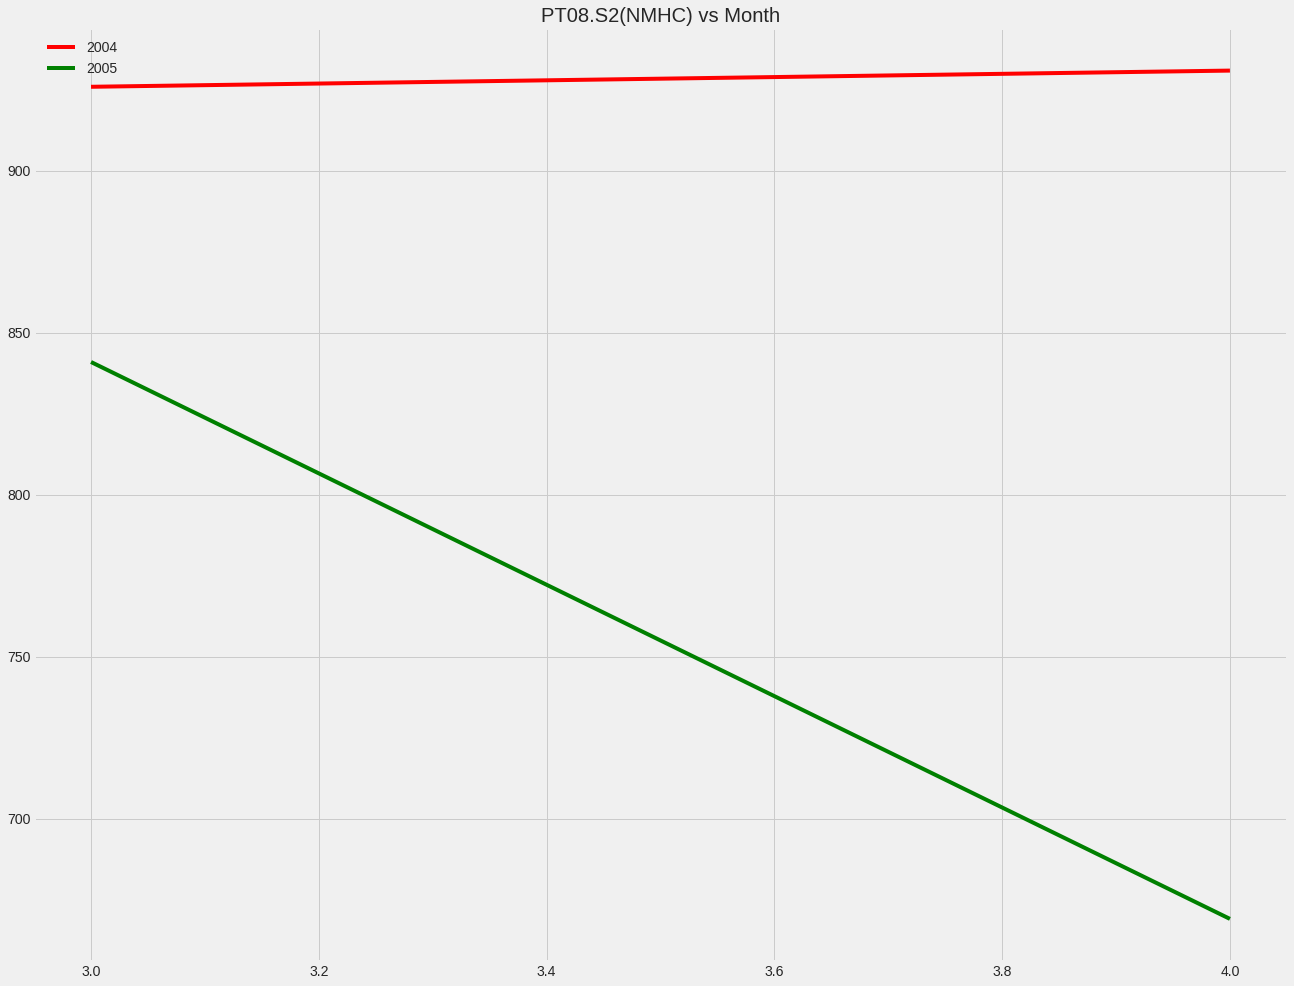

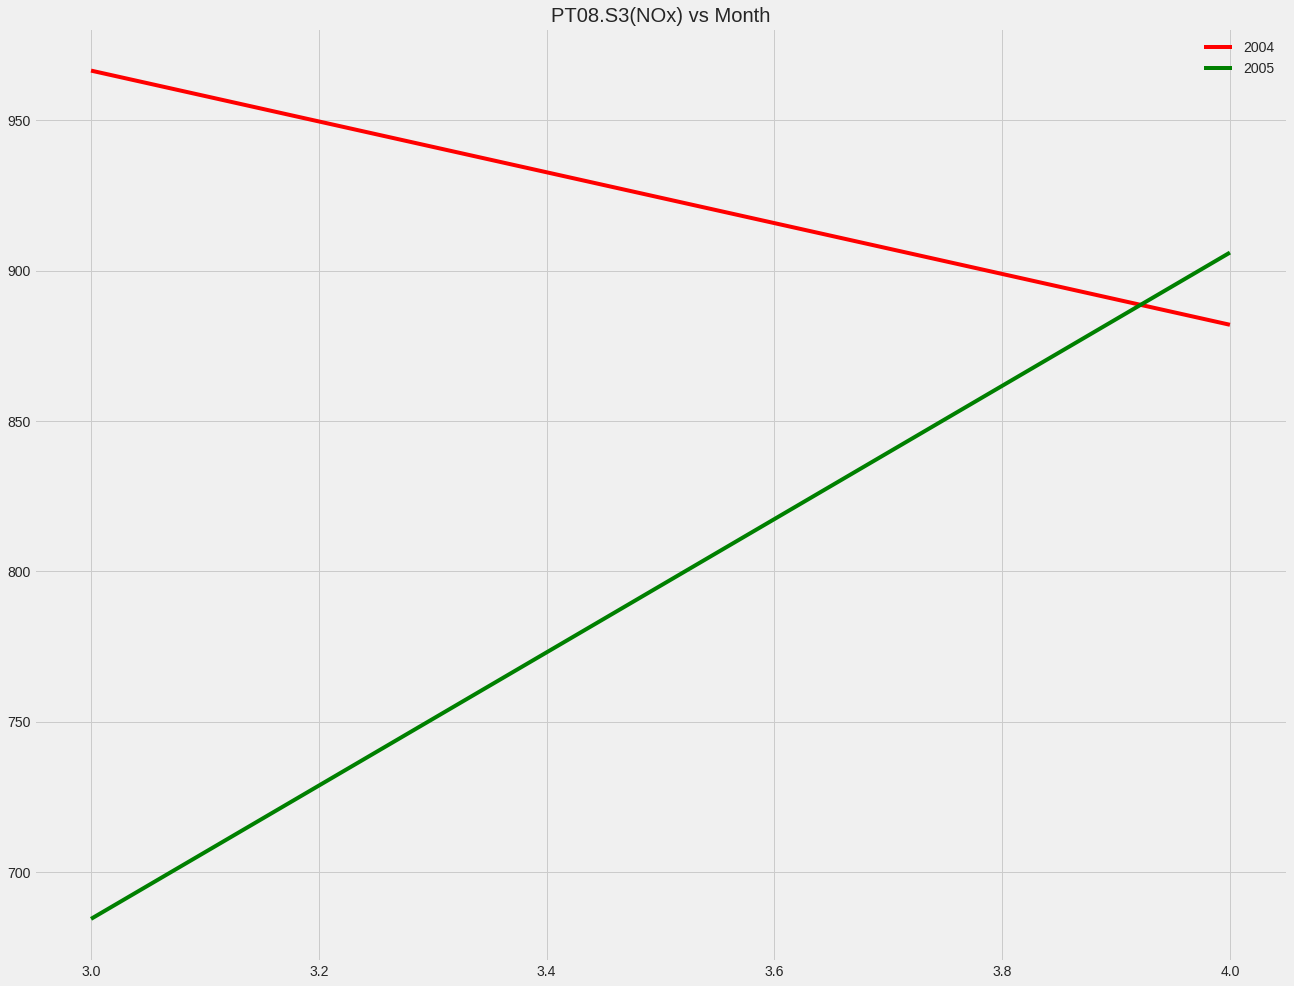

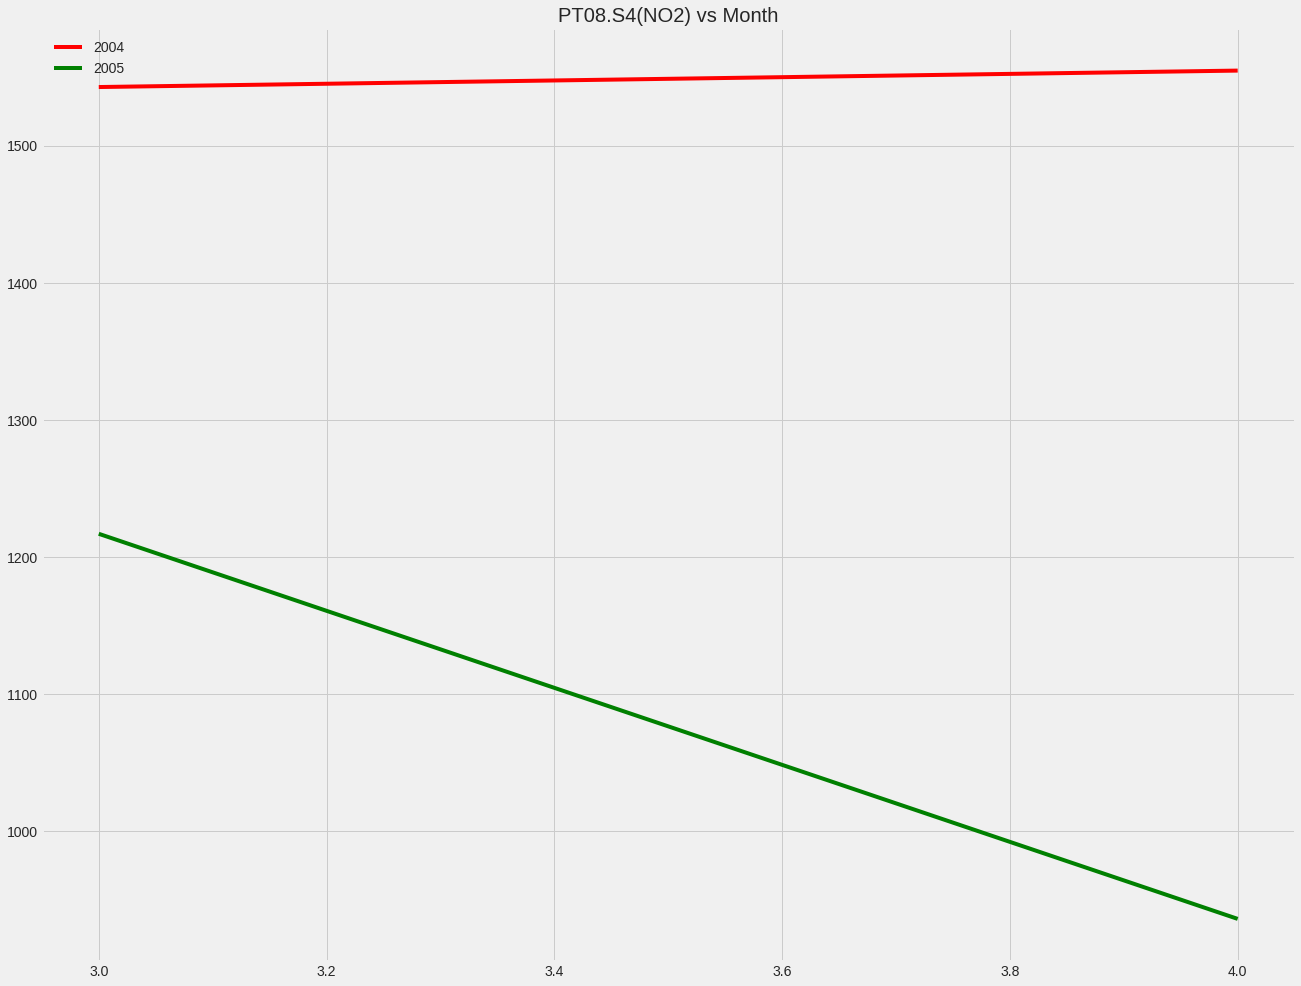

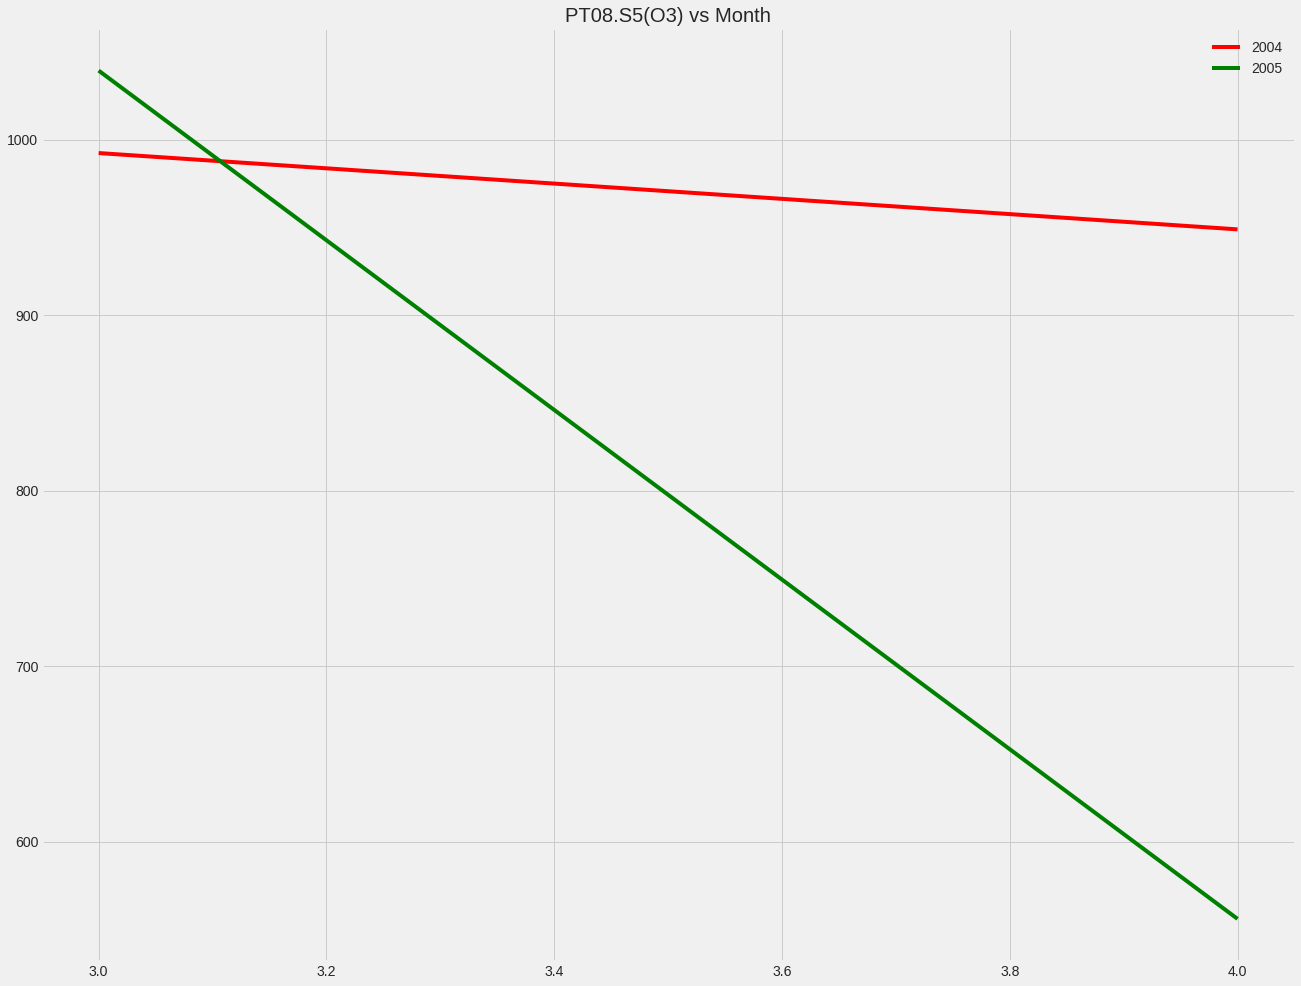

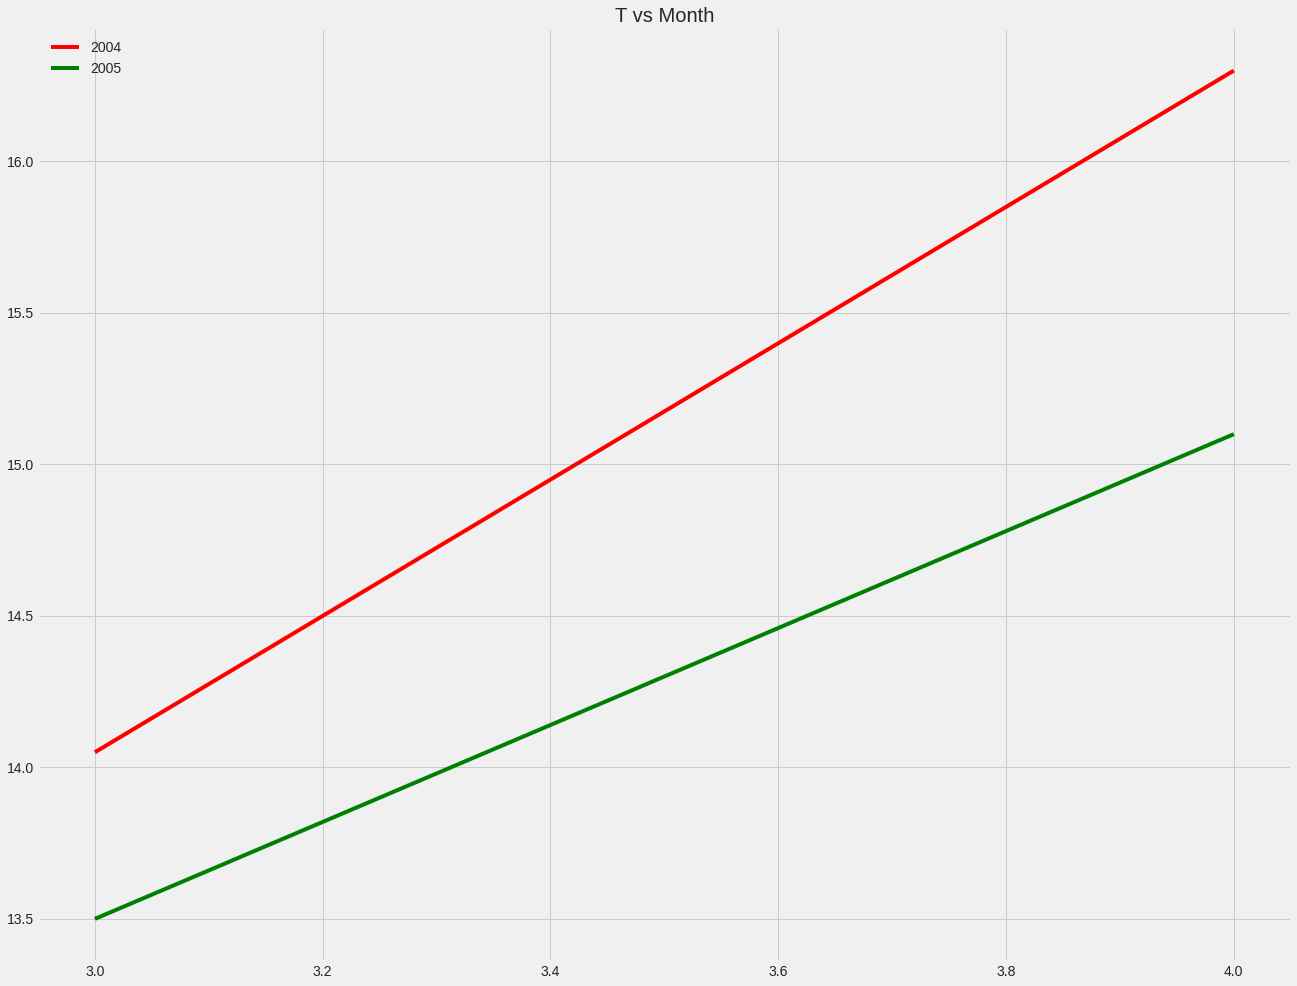

In [ ]:
# Created a month-wise comparison plot for all the air pollutants concentration, temperature, relative humidity and absolute humidity.
plt.style.use('fivethirtyeight')

for i in aq_2004_common_months.columns[1:-4]:
  plt.figure(figsize=(20, 16))
  plt.plot(same_months, aq_2004_common_months[i], color = 'red', label='2004')
  plt.plot(same_months, aq_2005_common_months[i], color = 'green', label='2005')
  plt.title(i + ' vs Month')
  plt.legend()

  plt.grid(True)
  plt.show()

We can't conclude much from the above graphs as the median values are compared for only two months.

---

In [ ]:
# Created a user-defined function to make a line plot between two series & also allows a user to change the plot attributes on fly.
def line_plot(style, width, height, x_axis, y_axis, year, color):
  plt.style.use(style)
  plt.figure(figsize=(width, height))
  plt.plot(x_axis, y_axis, color = color, label=str(year))
  plt.xticks(rotation=45)
  plt.grid(True)
  plt.show()

In the above code, a user-defined function is created:

- It takes the required seven inputs.

- The `style` attribute is passed to the `plt.style.use()` function.

- The `width` and `height` attributes are passed to the `plt.figure()` functions.

- The `plt.title()` function creates the title for each plot. The `name` attribute gets the column header of a Pandas series. E.g., the `name` attribute when applied on `aq_2004_df['DateTime']` series will return `'DateTime'` as an output.

- The `plt.plot()` function creates a line plot between the `x_series` and `y_series`. It takes `colour` attribute as the third parameter.

- The `plt.xticks()` function rotates the `x-axis` labels or indices by 45 degrees. 

- The `plt.grid(True)` function creates a grid for a line plot.

- The `plt.show()` function displays the plot.


The function then sets the style of the line plot, its dimensions, its title, creates a plot, rotates the x-axis labels by 45 degrees and sets a grid.

We apply this function on the 2004 DataFrame.

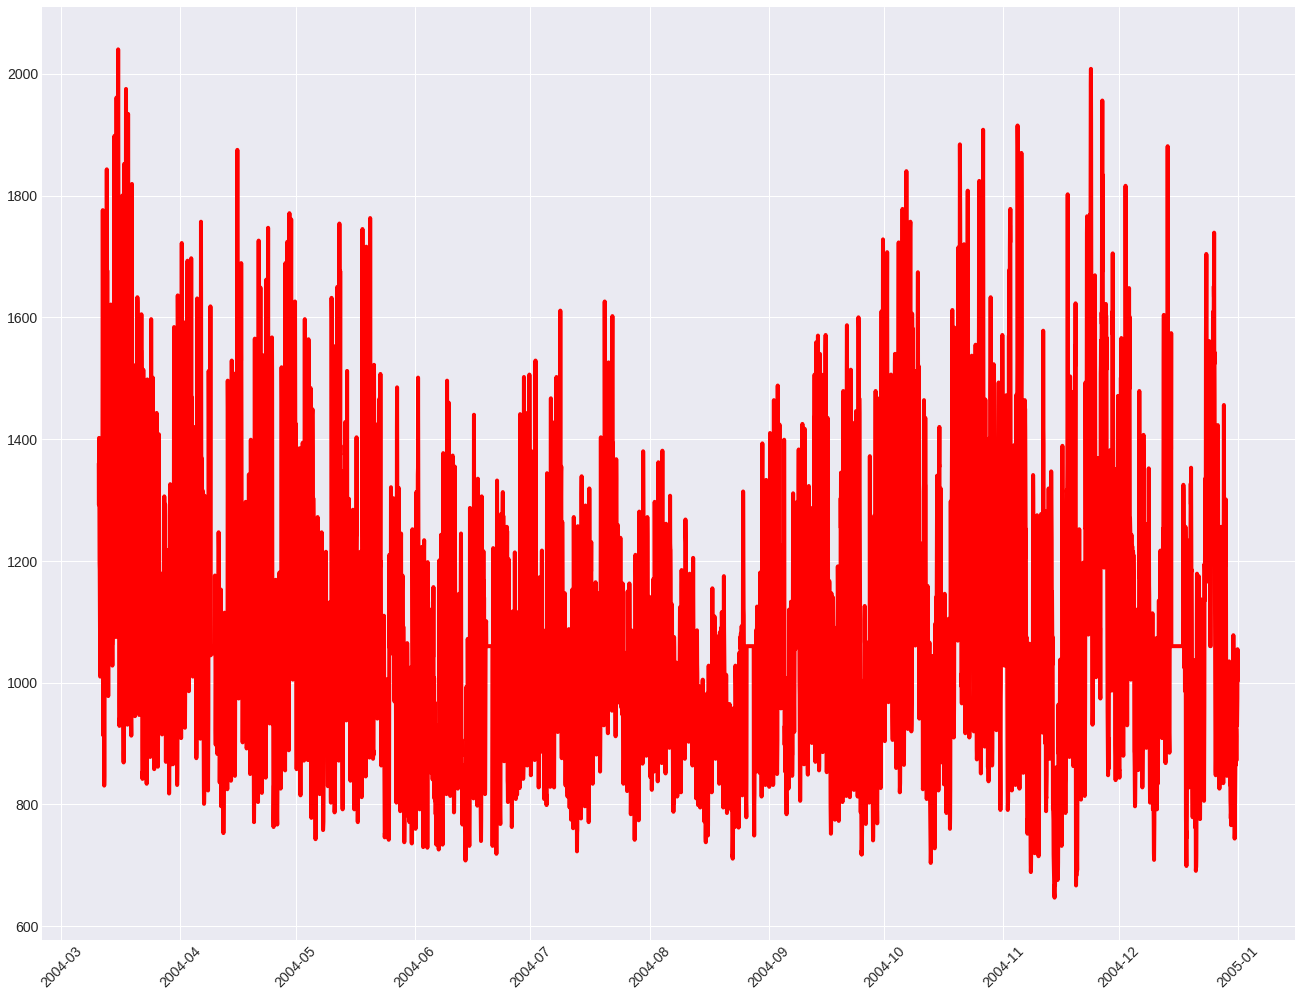

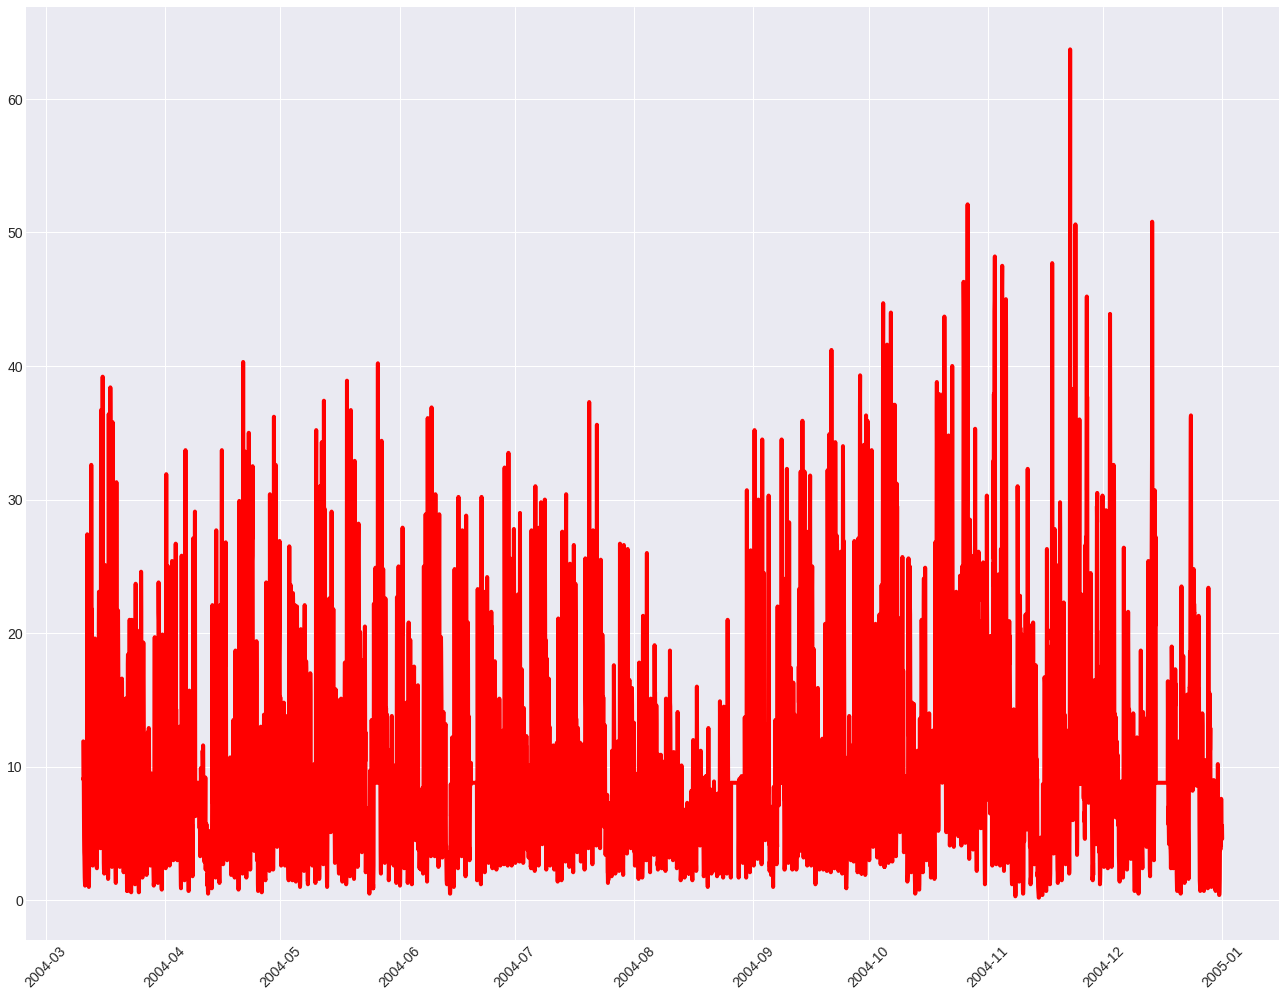

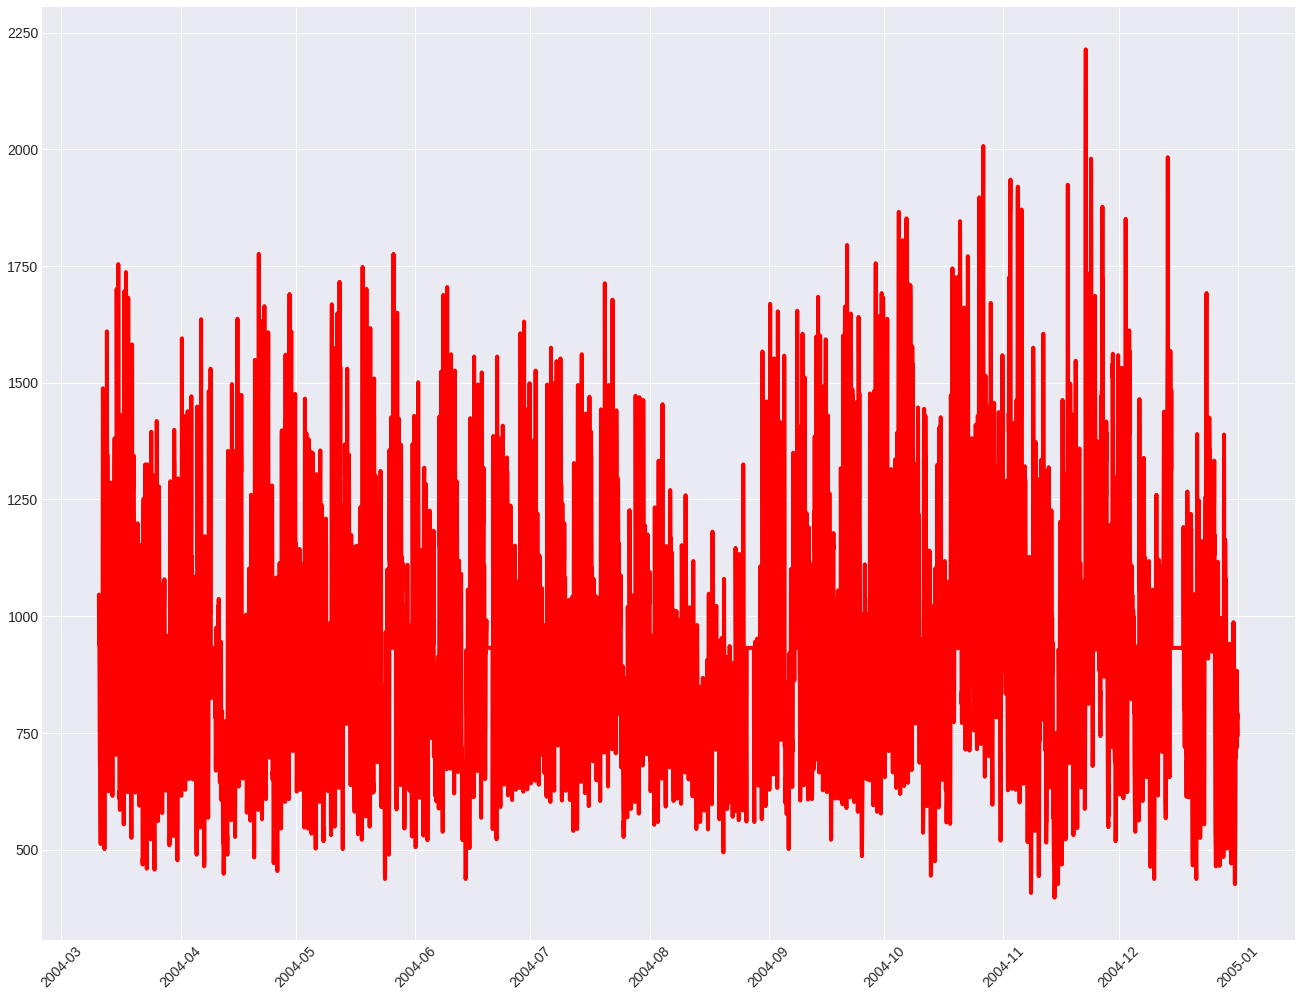

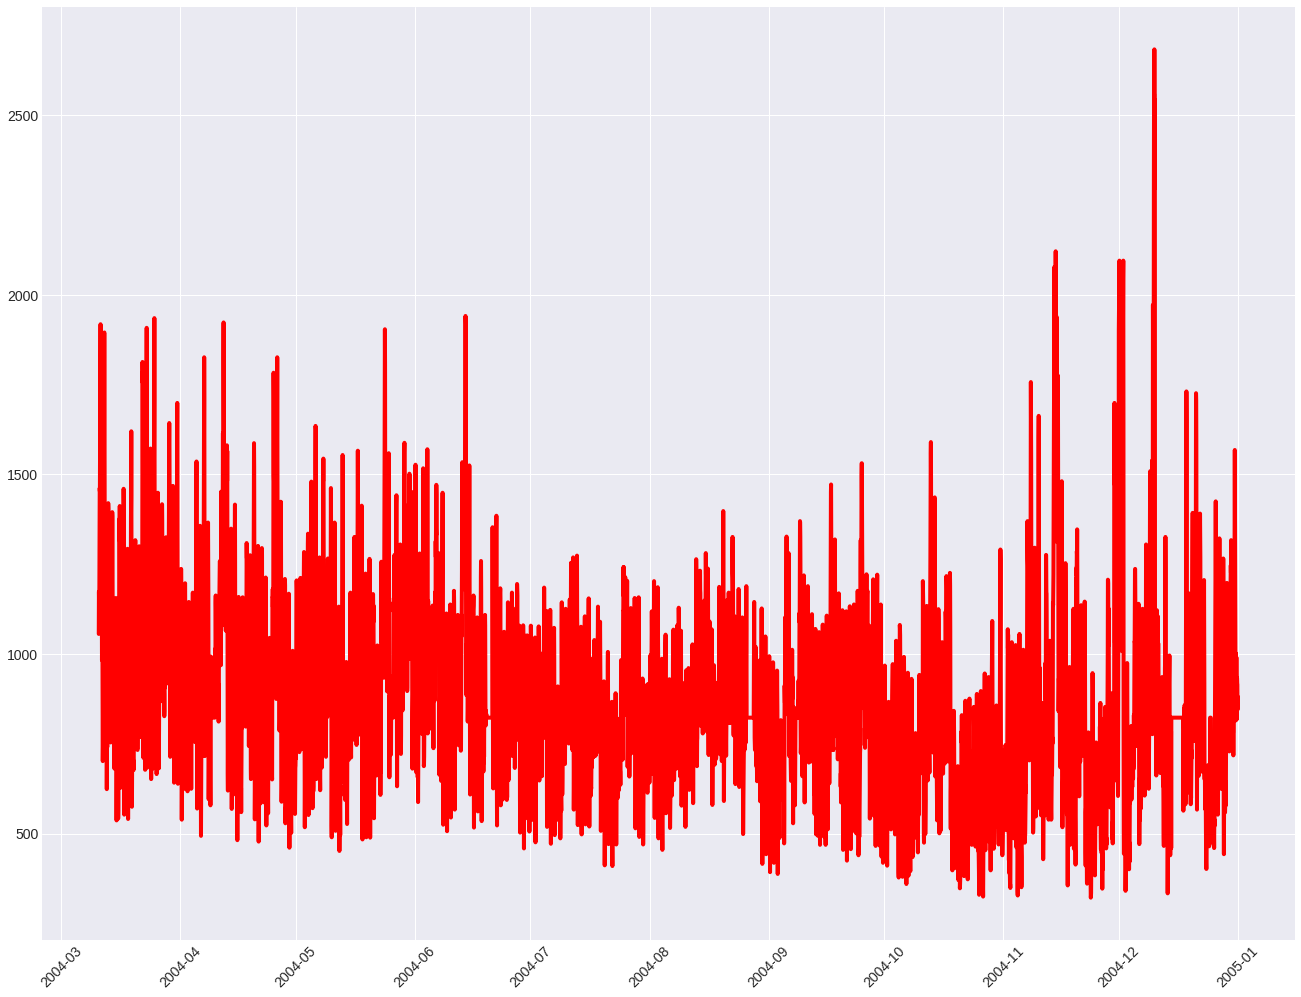

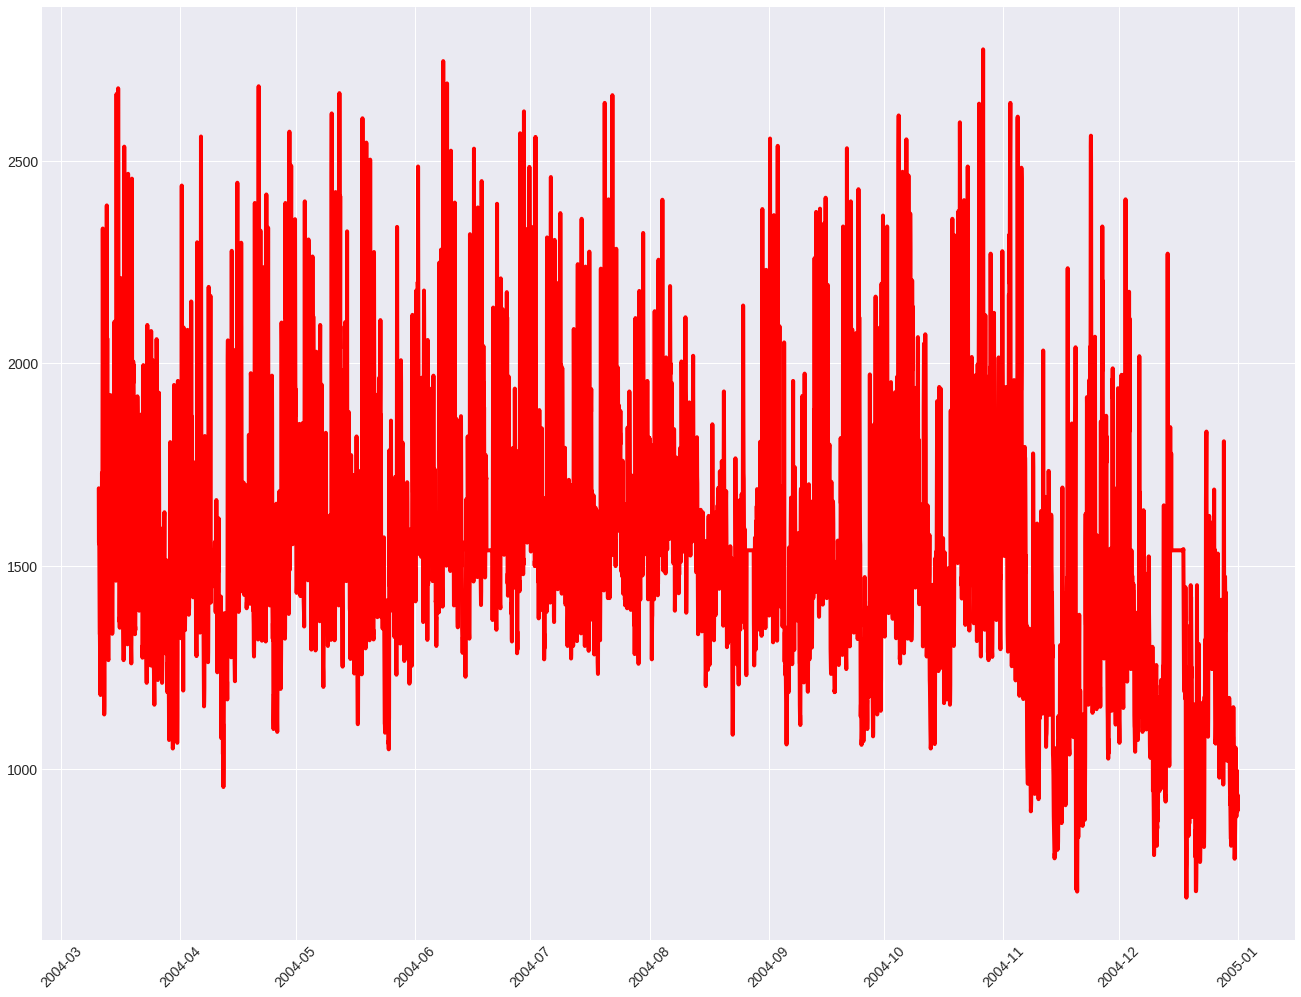

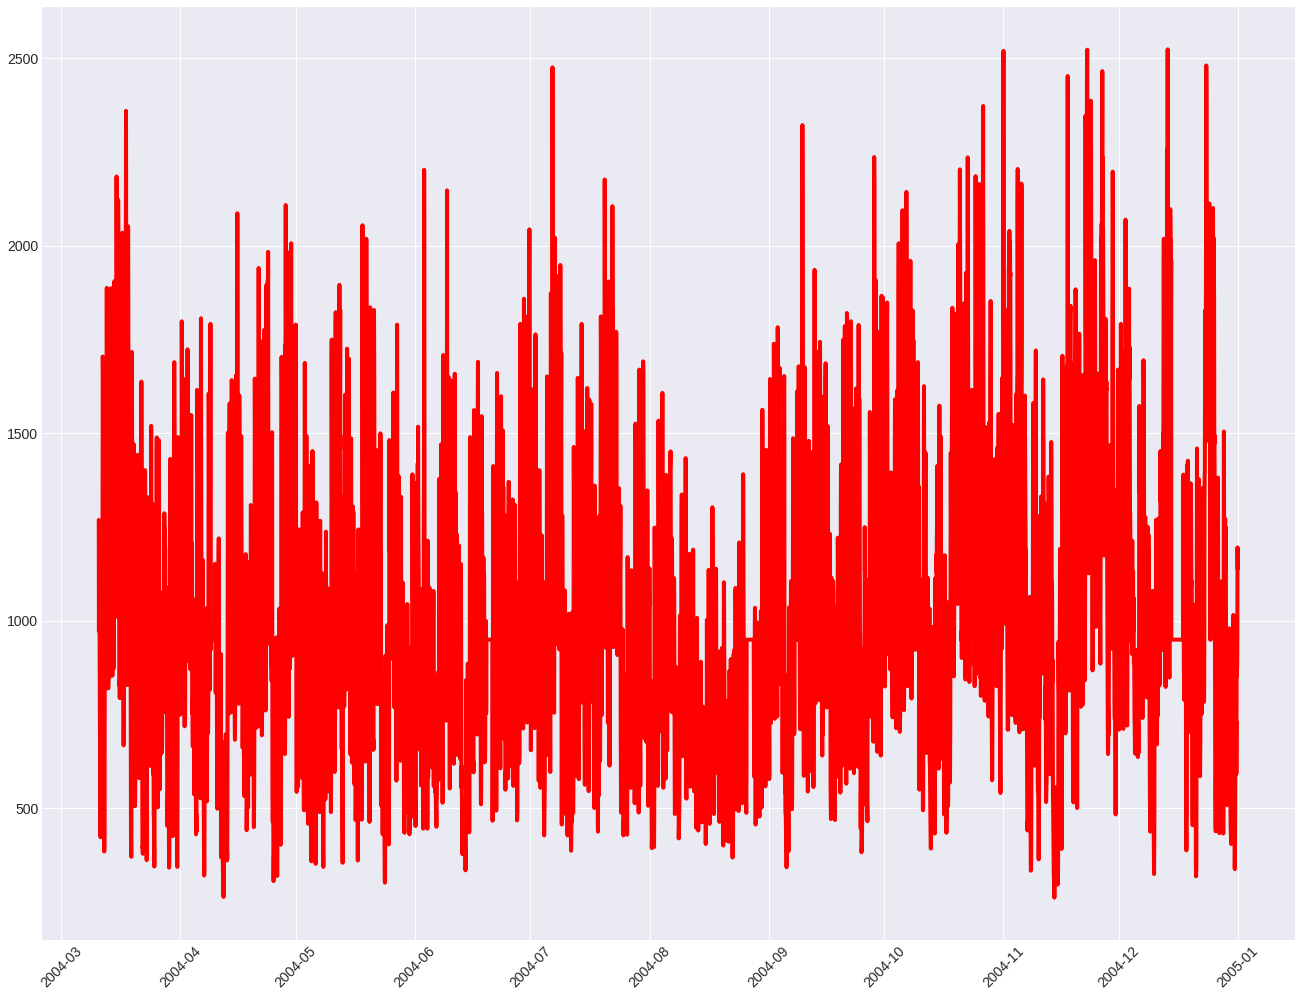

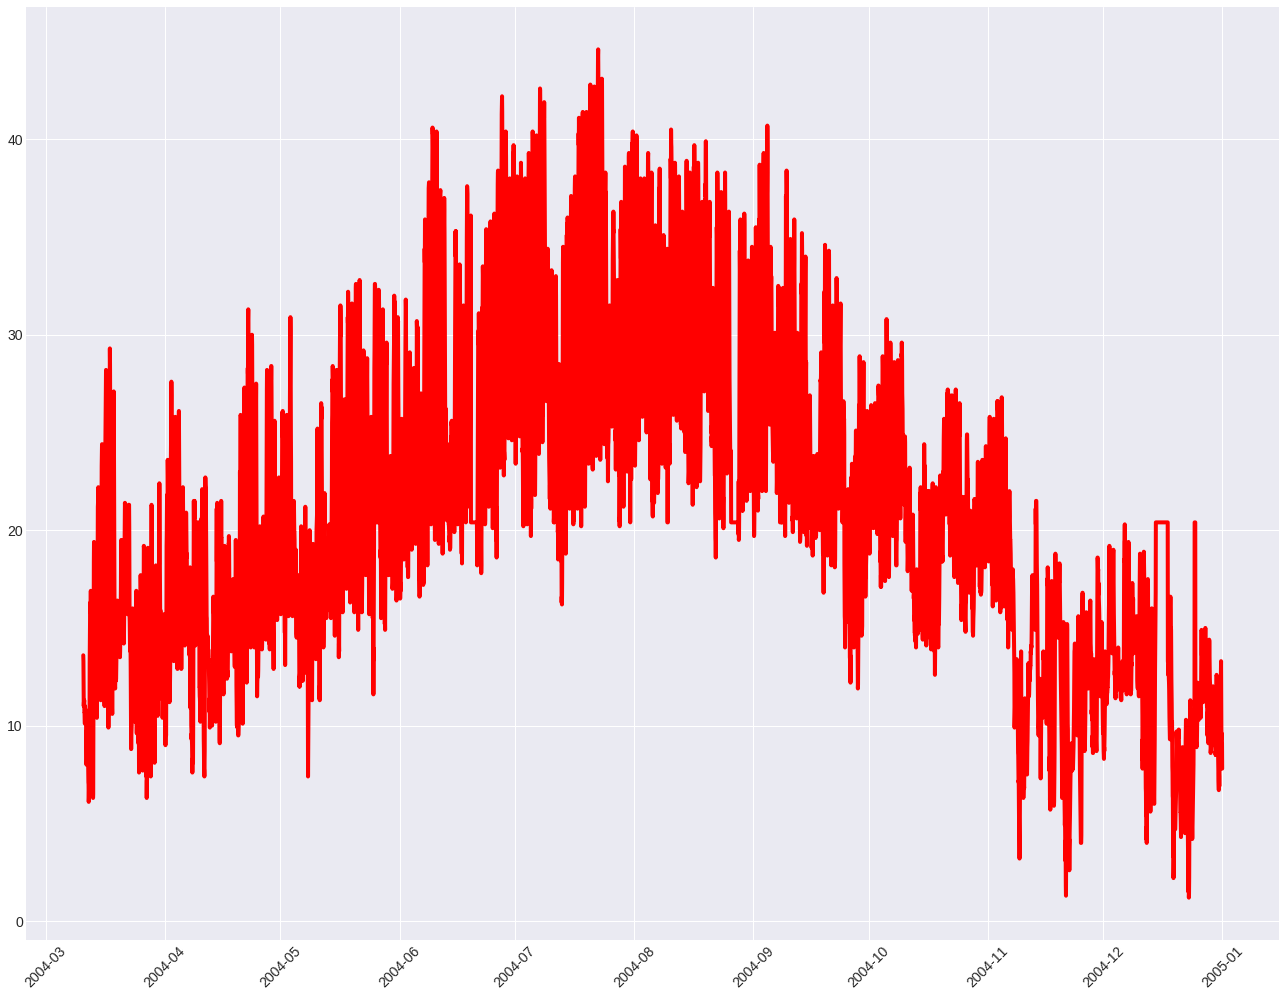

In [ ]:
# Created a line plot for all the air pollutants concentrations, temperature, relative & absolute humidity for the year 2004.
# This time using the 'seaborn-dark' style and red colour.

for i in aq_2004_common_months.columns[1:-4]:
  line_plot('seaborn-dark', 20, 16, aq_2004_df['DateTime'], aq_2004_df[i], 2004, 'red')
  

Let's also create the same plots for the year 2005.

#### Time-Series Multivariate Boxplots^

We concatenate both the 2004 and 2005 year DataFrames to obtain one DataFrame.

**The `pd.concat()` Function**

To concatenate two or more DataFrames having the exact same columns, we use the `pd.concat()` function. The DataFrames to be concatenated are passed as a list of DataFrames.

In [ ]:
# Concatenated the two DataFrames for 2004 and 2005 to obtain one DataFrame.
common_df = pd.concat([aq_2004_df, aq_2005_df])

In [ ]:
# Found the number of rows and columns in the concatenated DataFrame.
common_df.shape

(9357, 14)

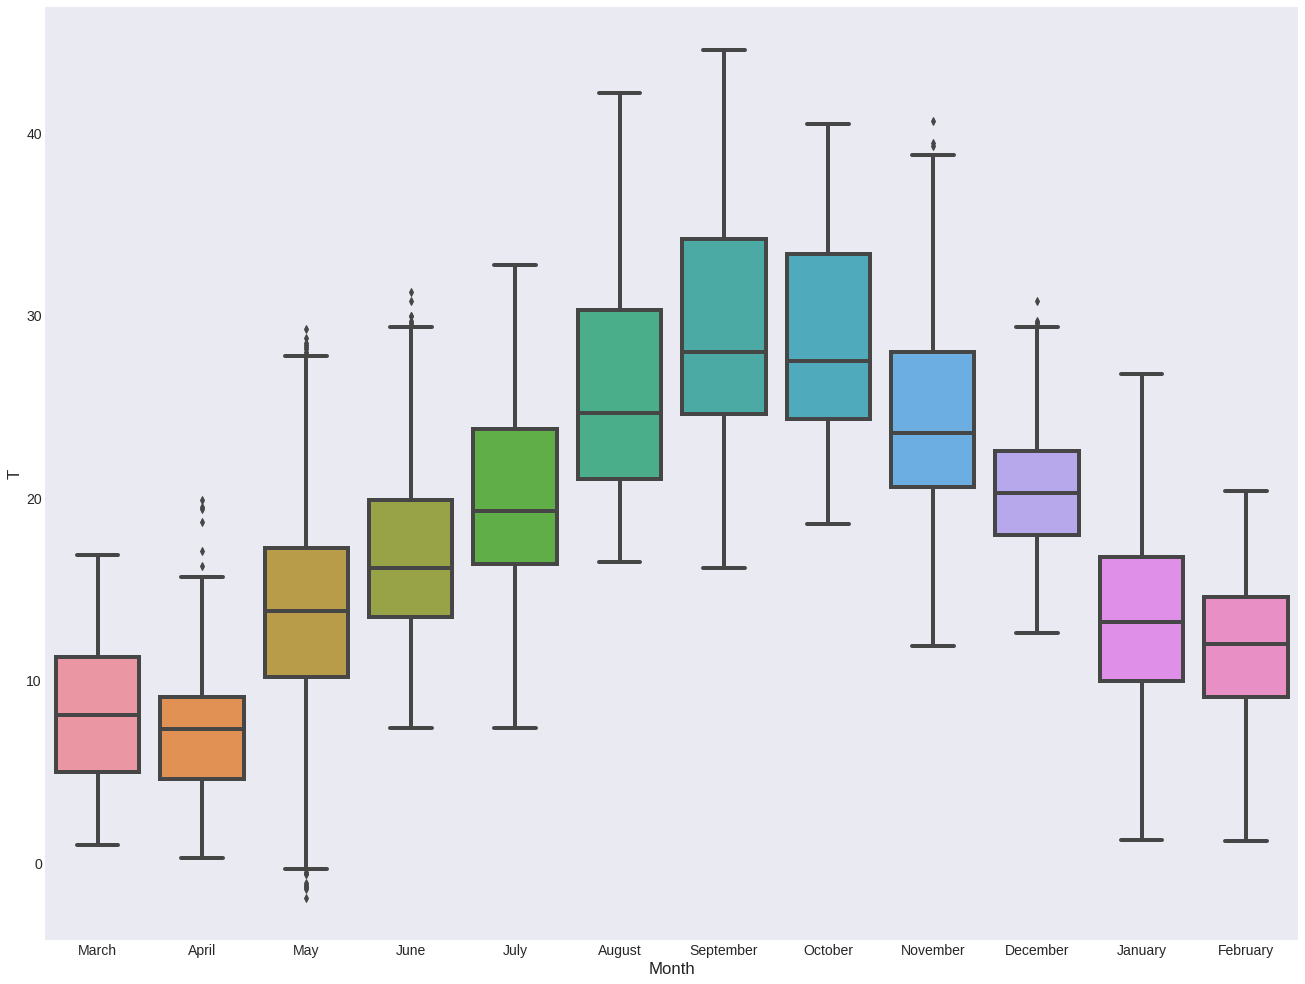

In [ ]:
# Created a boxplot for month-wise variation in temperature. 
months = common_df['DateTime'].dt.month_name().unique()
num = np.arange(12)
plt.figure(figsize=(20, 16))
sns.boxplot(x='Month', y='T', data=common_df)

plt.xticks(ticks=num, labels=months)
plt.show()

We can split the above boxplots by year for each month by passing the `Year` column as a value to the `hue` parameter inside the `sns.boxplot()` function.

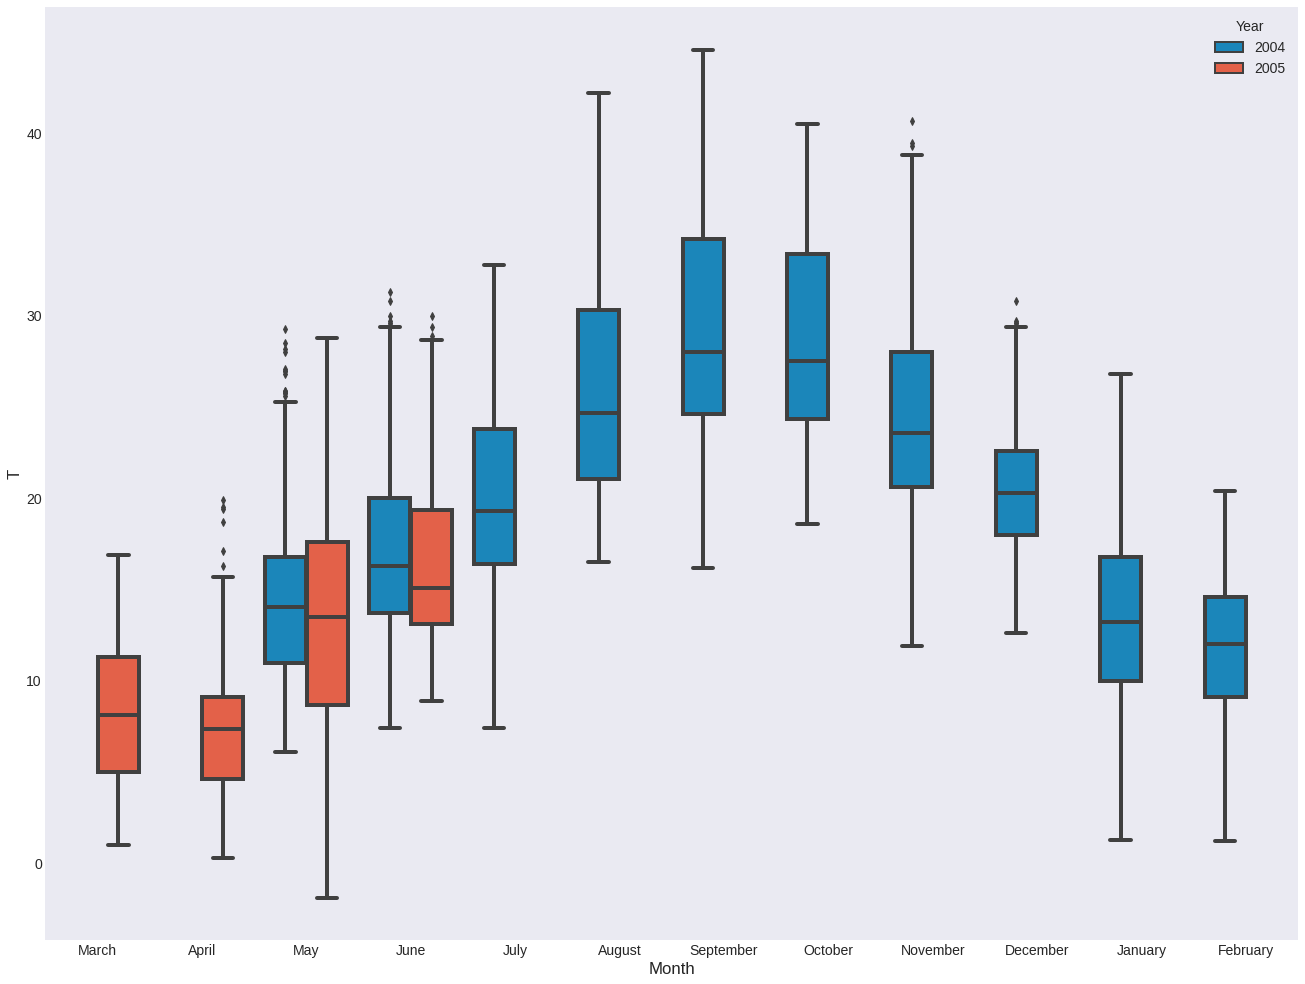

In [ ]:
# Created a boxplot for month-wise variation in temperature split by year. 
months = common_df['DateTime'].dt.month_name().unique()
num = np.arange(12)
plt.figure(figsize=(20, 16))
sns.boxplot(x='Month', y='T', data=common_df, hue='Year')

plt.xticks(ticks=num, labels=months)
plt.show()

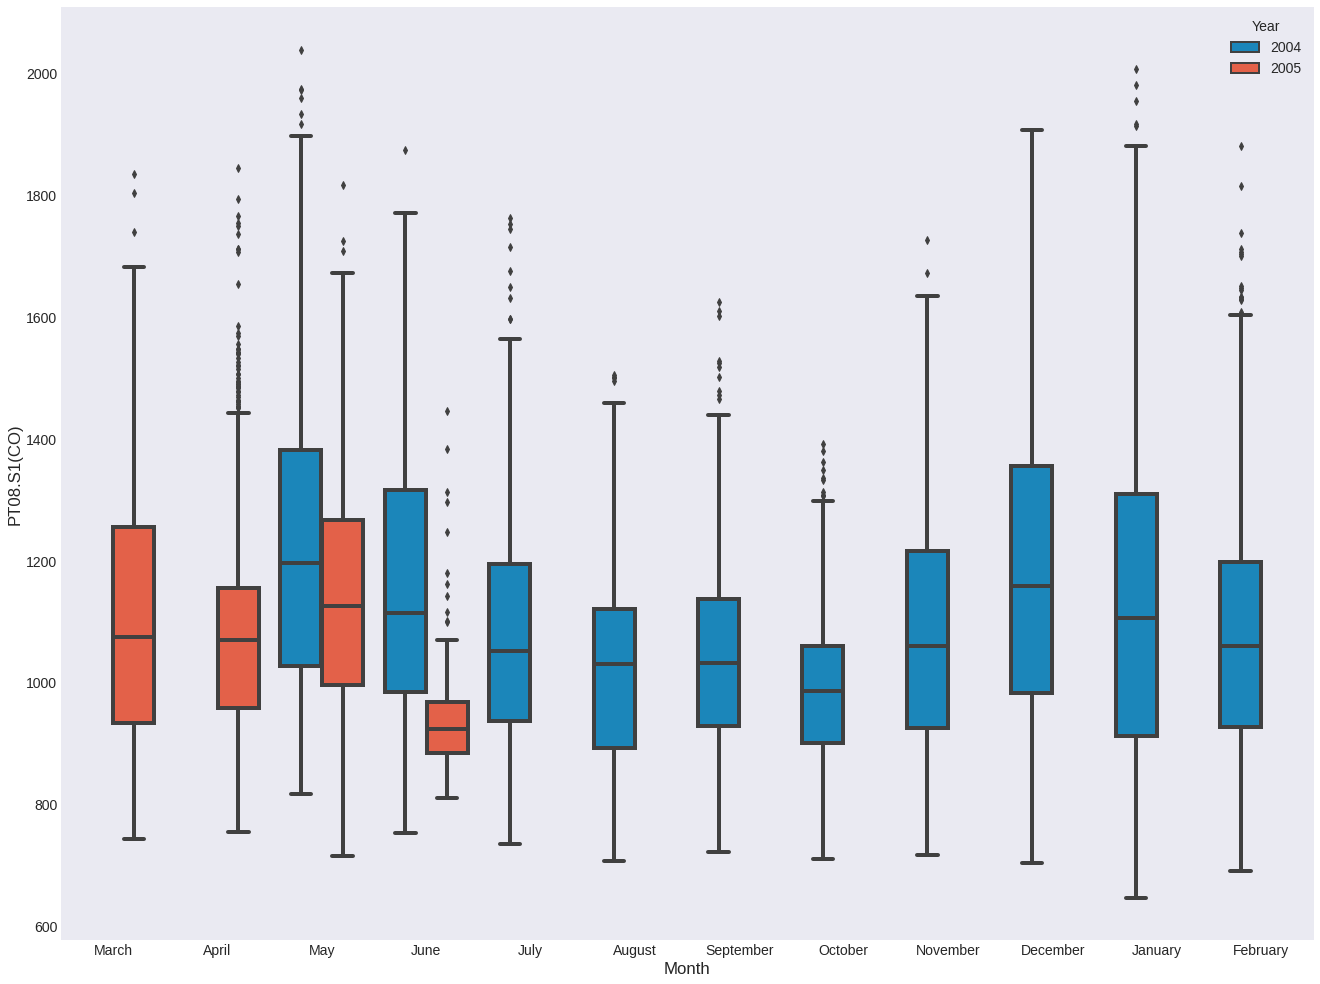

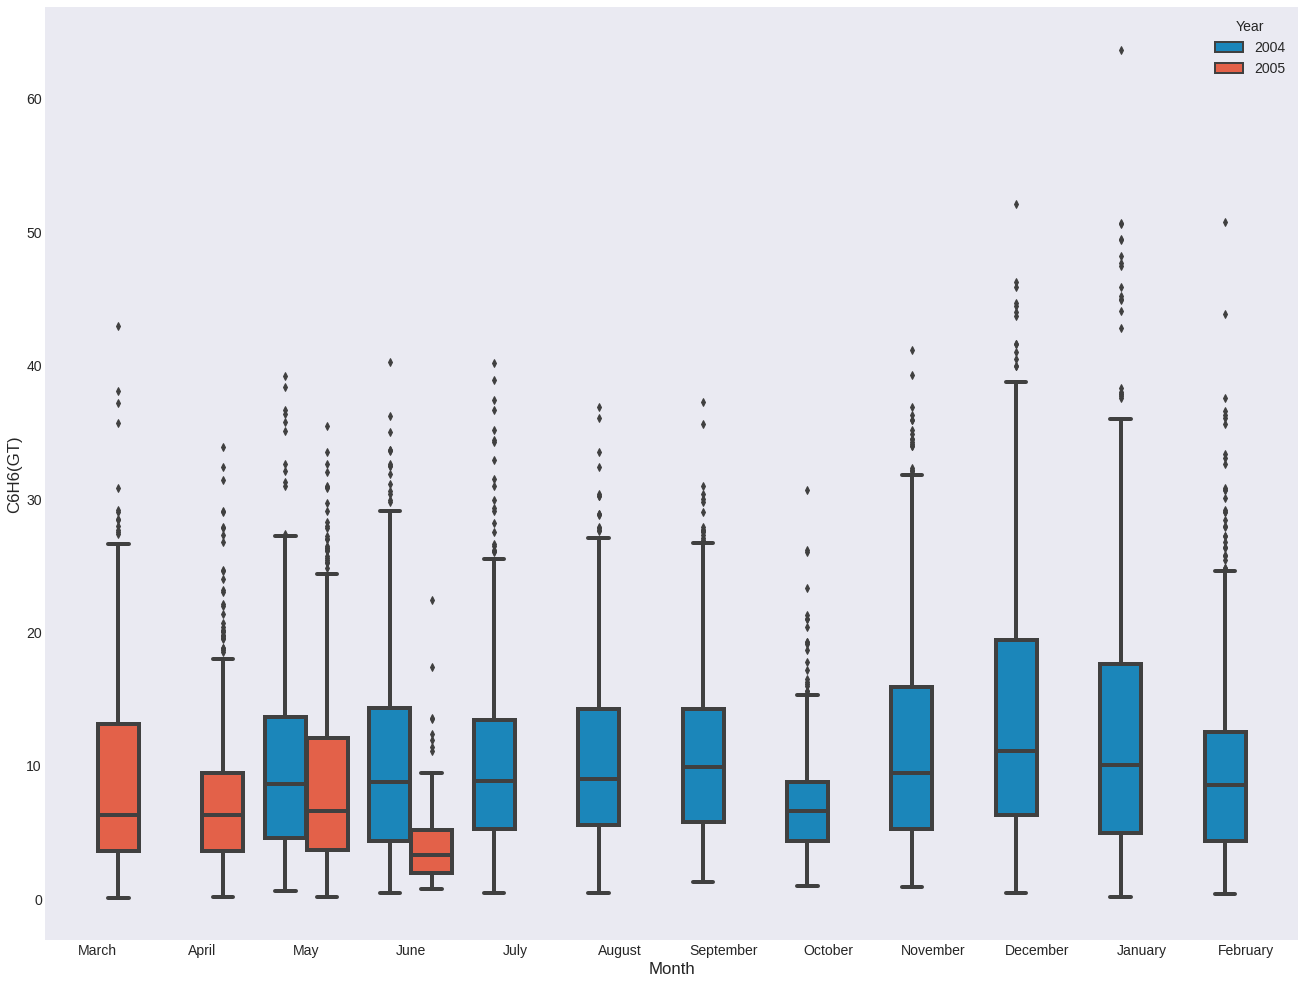

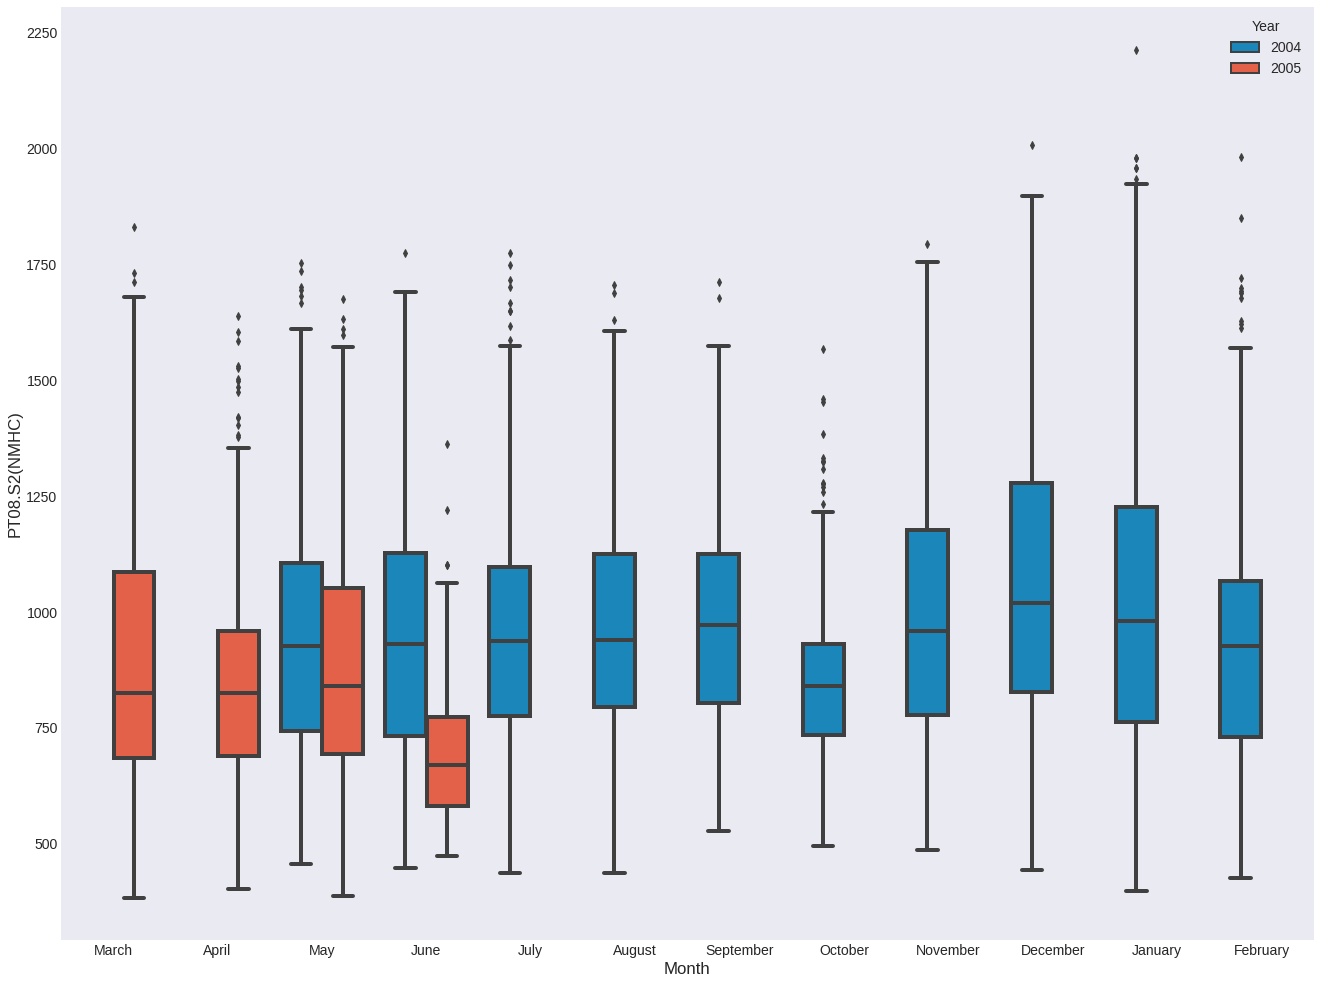

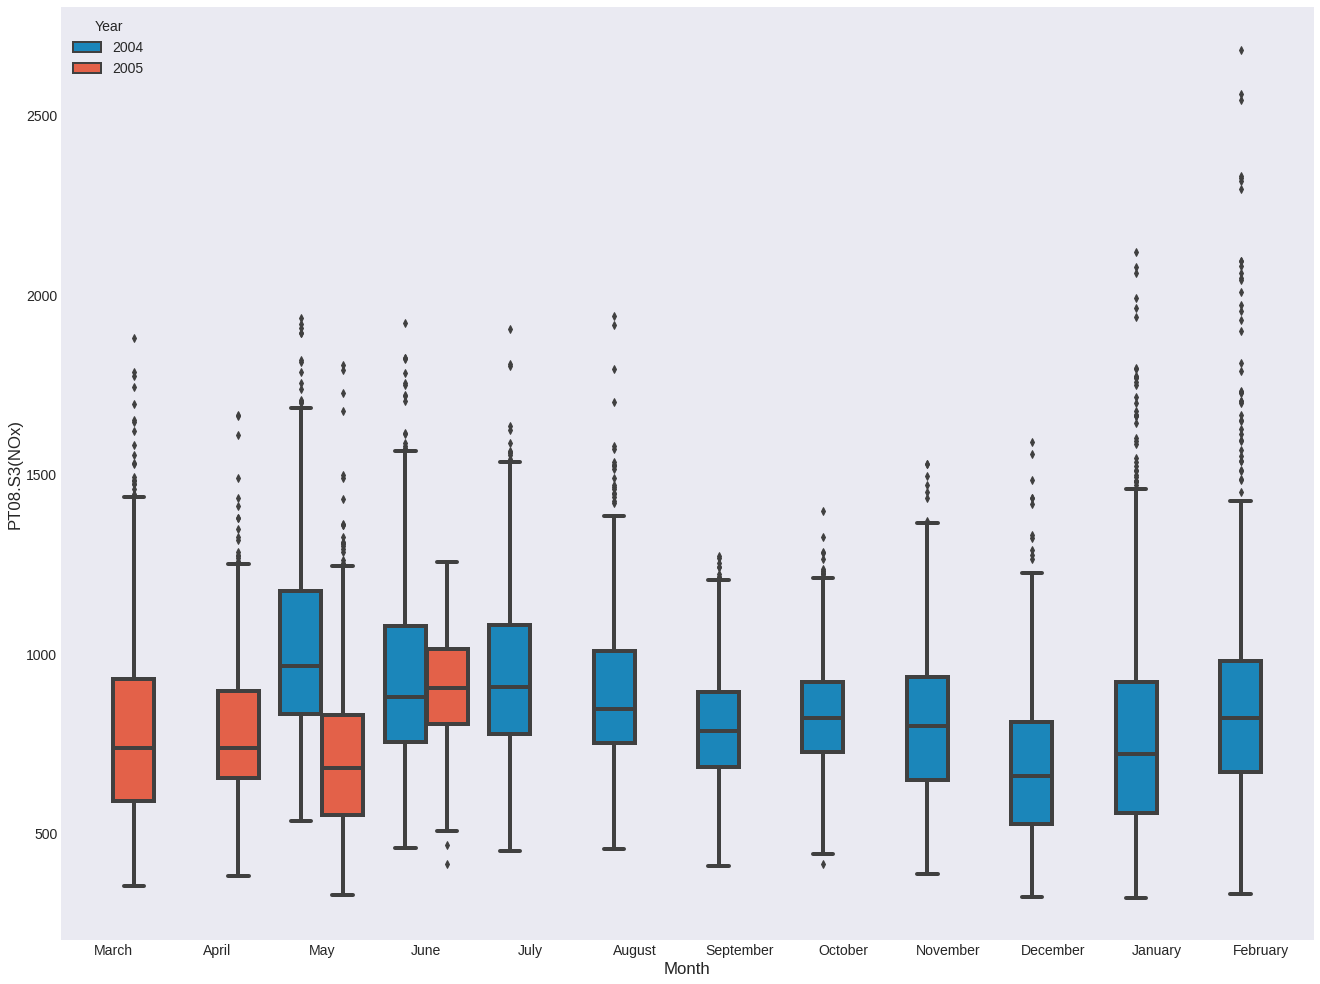

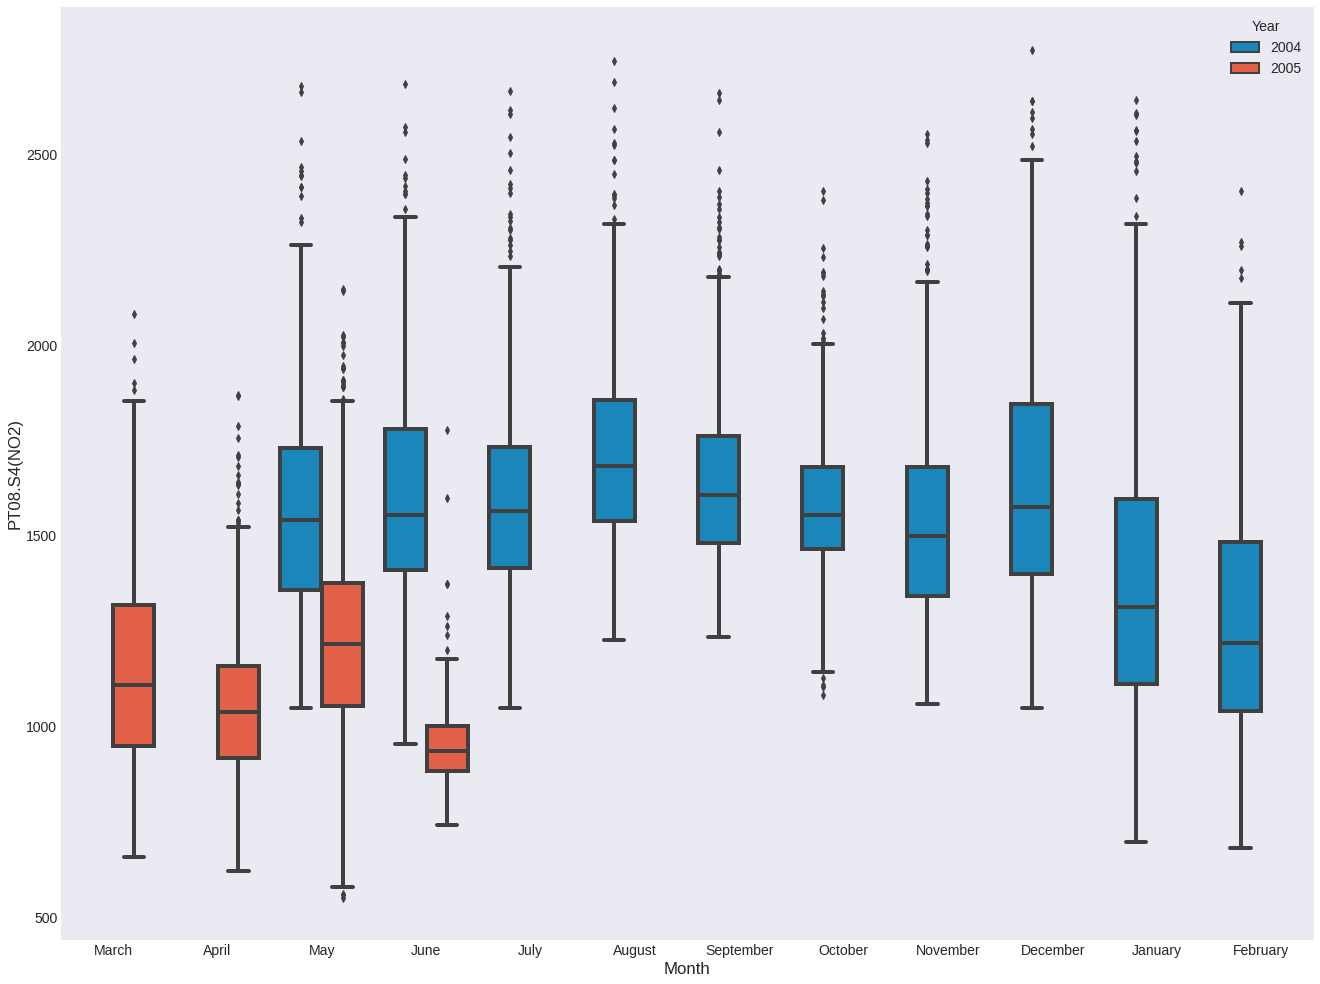

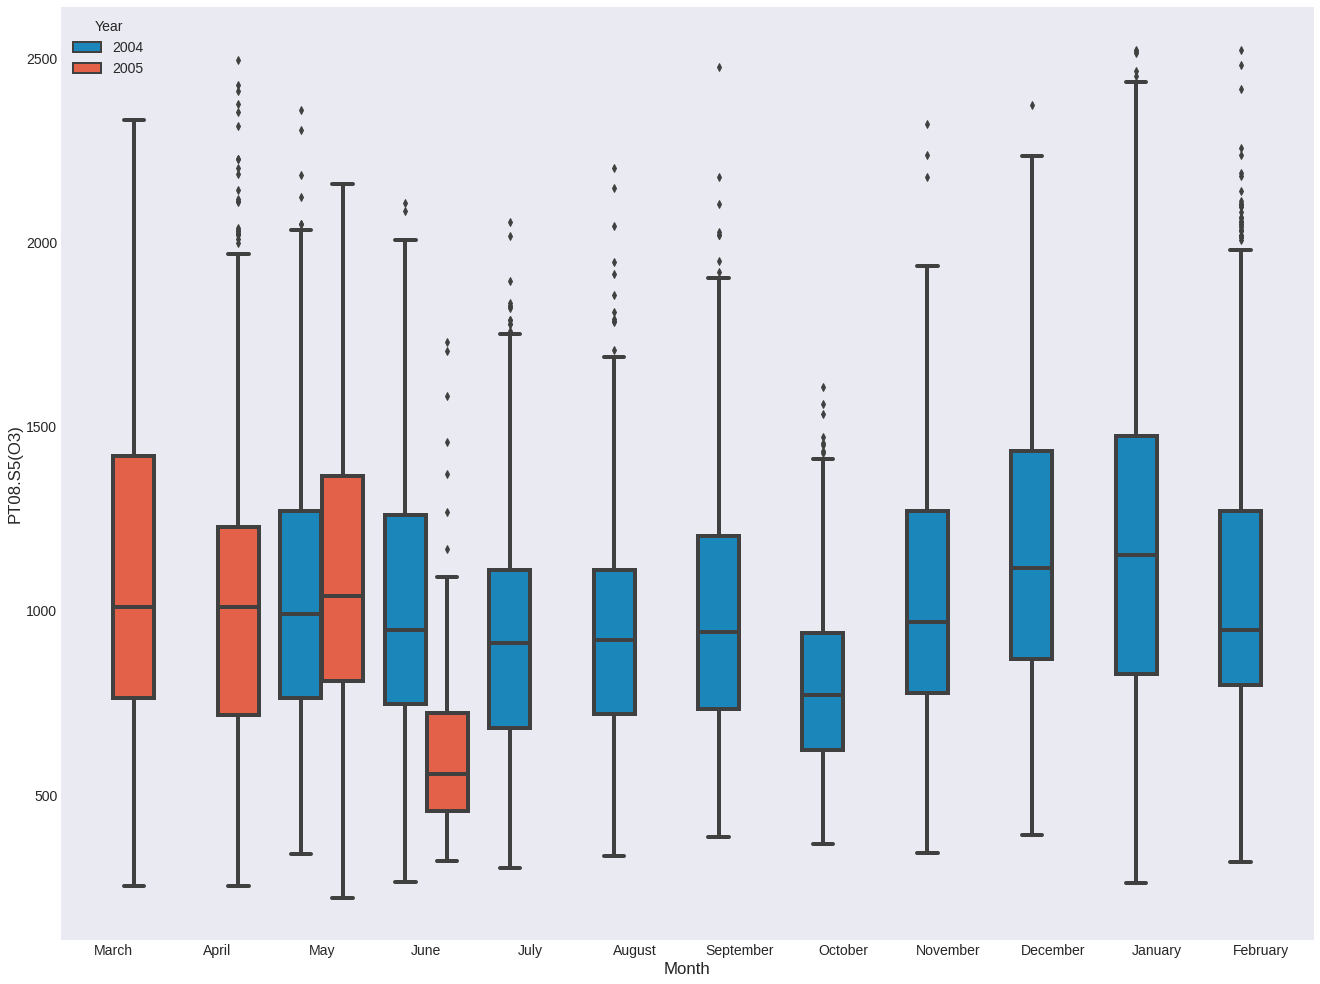

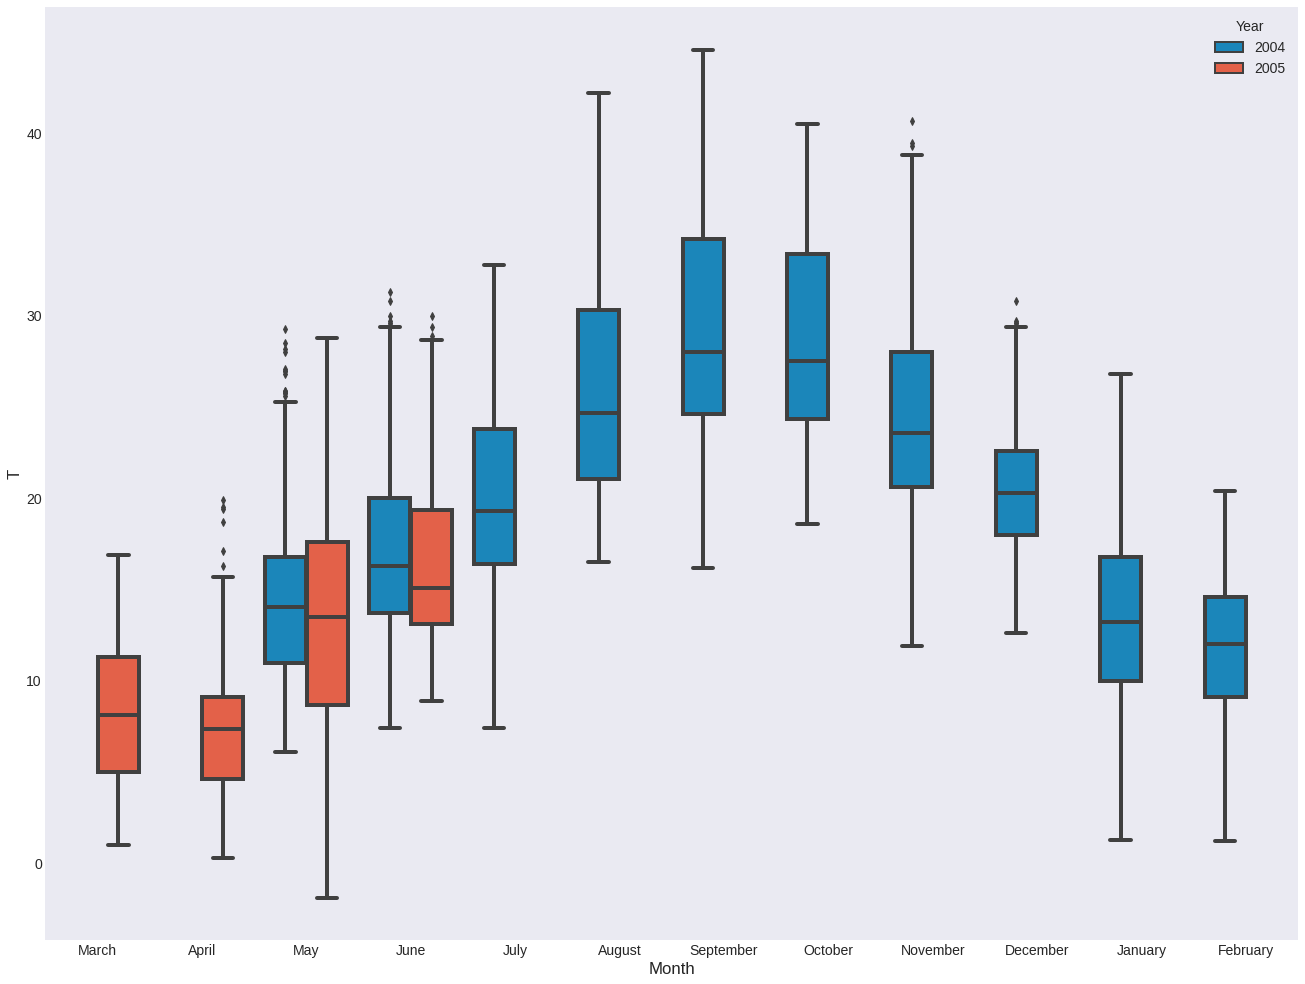

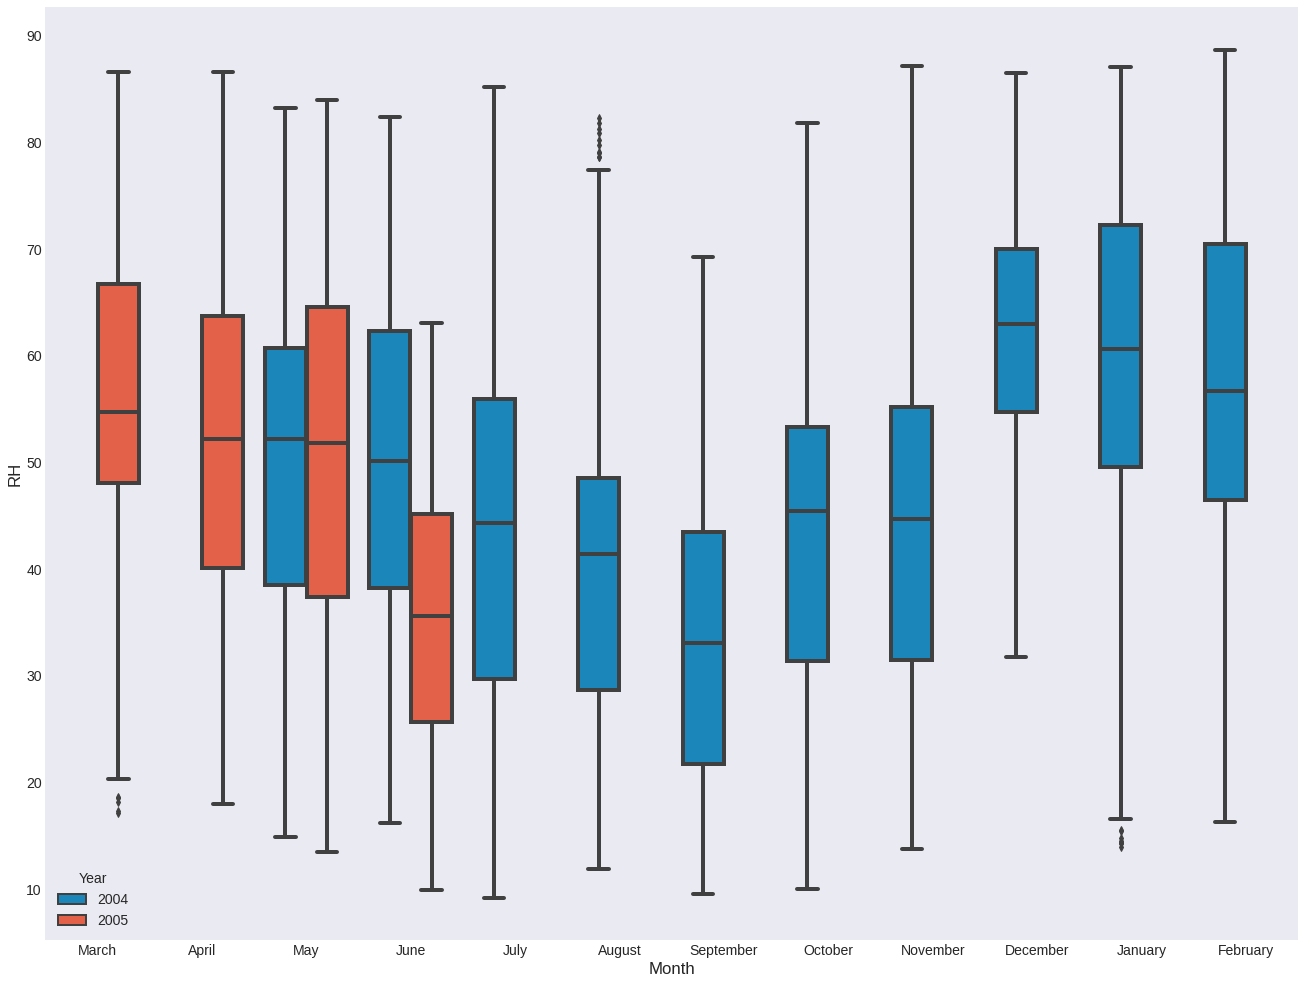

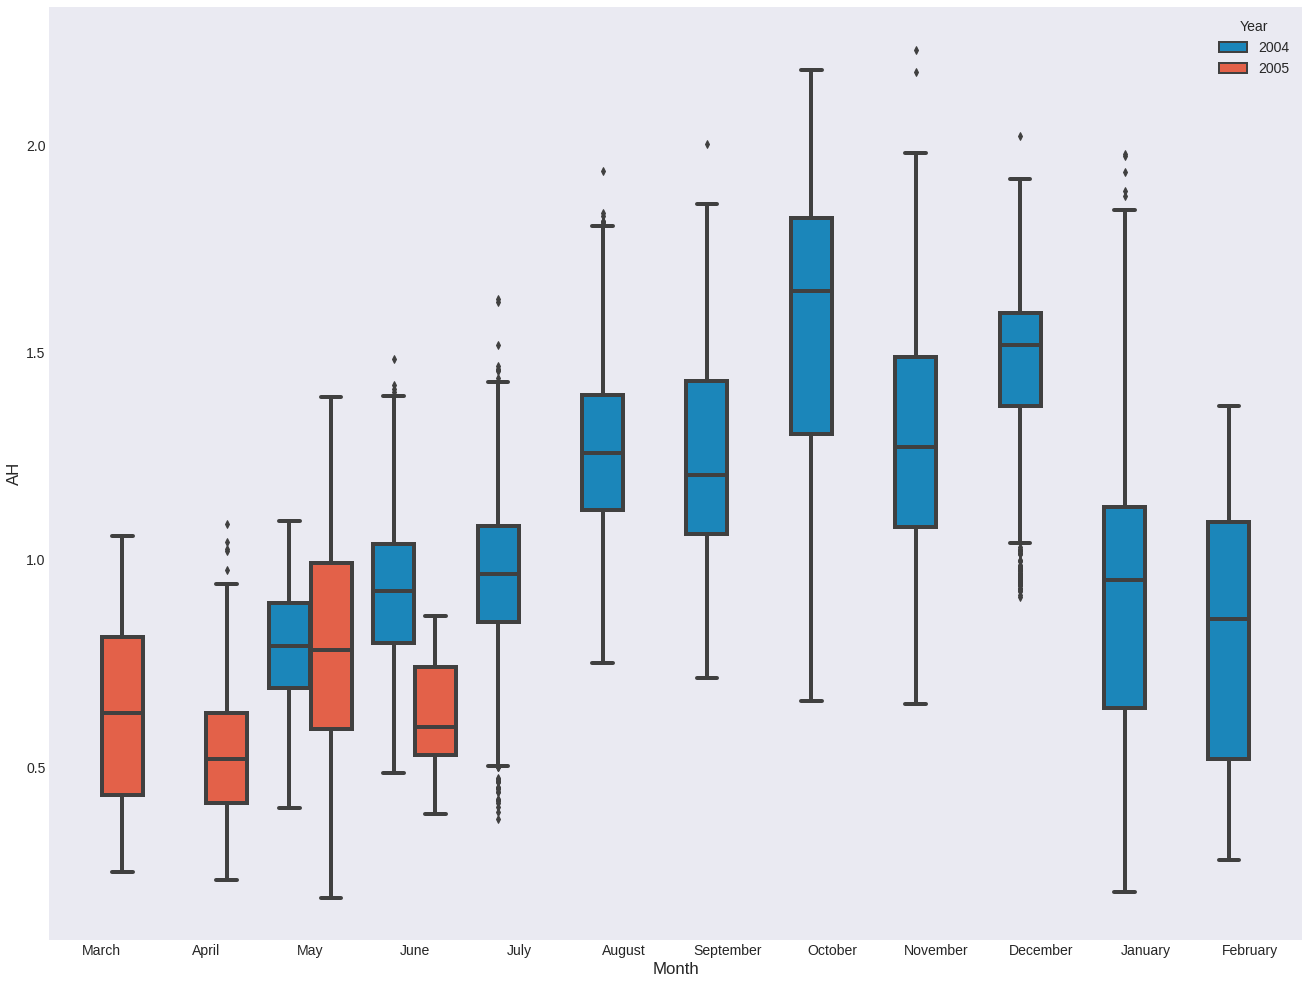

In [ ]:
# Created the box plot for month-wise concentrations of all the air pollutants, temperature and relative humidity. 
# Using the 'classic' style this time.
for i in common_df.columns[1:-4]:
  plt.figure(figsize=(20, 16))
  sns.boxplot(x='Month', y=i, data=common_df, hue='Year')
  plt.xticks(ticks=num, labels=months)
  plt.show()